## Imports & Installs

In [ ]:
!pip install pandas tables anndata scanpy pyensembl biopython torch-geometric wandb gseapy networkx matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.5/548.5 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 537.2/537.2 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00
   ━━━━

In [ ]:
import wandb
wandb.login(key='41b6313df9326b920756d1ecc35bacd177d53fd7')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!pyensembl install --release 77 --species homo_sapiens

2024-12-17 18:14:40,795 - pyensembl.shell - INFO - Running 'install' for EnsemblRelease(release=77, species='homo_sapiens')
2024-12-17 18:14:40,795 - pyensembl.download_cache - INFO - Fetching /root/.cache/pyensembl/GRCh38/ensembl77/Homo_sapiens.GRCh38.77.gtf.gz from URL https://ftp.ensembl.org/pub/release-77/gtf/homo_sapiens/Homo_sapiens.GRCh38.77.gtf.gz
2024-12-17 18:14:40,795 - datacache.download - INFO - Downloading https://ftp.ensembl.org/pub/release-77/gtf/homo_sapiens/Homo_sapiens.GRCh38.77.gtf.gz to /root/.cache/pyensembl/GRCh38/ensembl77/Homo_sapiens.GRCh38.77.gtf.gz
2024-12-17 18:15:43,102 - pyensembl.download_cache - INFO - Fetching /root/.cache/pyensembl/GRCh38/ensembl77/Homo_sapiens.GRCh38.cdna.all.fa.gz from URL https://ftp.ensembl.org/pub/release-77/fasta/homo_sapiens/cdna/Homo_sapiens.GRCh38.cdna.all.fa.gz
2024-12-17 18:15:43,102 - datacache.download - INFO - Downloading https://ftp.ensembl.org/pub/release-77/fasta/homo_sapiens/cdna/Homo_sapiens.GRCh38.cdna.all.fa.gz to

## Download & Data Preparation

In [1]:
import anndata as ad

# Load the .h5ad file
file_path = '/content/drive/MyDrive/raw_T_cell_IP_combined_DGH.h5ad'
adata = ad.read_h5ad(file_path)

# get gene names
genes_ccr = set(adata.var_names)
print(genes_ccr)

{'CALML4', 'FGB', 'HIP1R', 'RGS12', 'LINC02780', 'CLEC6A', 'LINC02575', 'COX18', 'LINC02555', 'SERTAD4', 'MKRN1', 'BAG1', 'CEP83', 'AC036108.1', 'FAM111A-DT', 'SLC12A5', 'TRDN-AS1', 'AL442663.3', 'MYBPC3', 'AKR1B15', 'FGF23', 'AC068408.2', 'AC020661.1', 'LINC00630', 'ZBTB40', 'AC092687.1', 'SERPINA9', 'AC084364.3', 'AC133485.2', 'CHIA', 'TRAF3IP3', 'NACA', 'PITHD1', 'CUTA', 'NFU1', 'LINC00882', 'AC111006.1', 'PHF24', 'AF111167.1', 'TYMP', 'AC079943.2', 'MIXL1', 'DCUN1D2', 'FNDC10', 'GPR160', 'ILK', 'OR4D11', 'AL137800.1', 'TAFA4', 'PPP1R14A', 'AC007639.1', 'AC113145.1', 'AC004825.2', 'DCAF8L1', 'ADORA2A-AS1', 'CT47A6', 'PPIL6', 'TNK2', 'AC004448.1', 'TRPV3', 'AL513218.2', 'AC012317.1', 'AC009754.1', 'LINC01748', 'TLX2', 'TST', 'AL359921.1', 'AC025162.1', 'ZNF329', 'C16orf70', 'PDHB', 'AC069368.2', 'LMO3', 'ANKS6', 'DPYD', 'AP1S1', 'AC121342.1', 'EGFL7', 'SNAI3', 'AC104316.1', 'AP005131.7', 'SETBP1', 'AC099782.2', 'RUFY3', 'SPATA4', 'LINC02148', 'ALG2', 'KRTAP10-12', 'AC098679.6', 'LINC

In [2]:
import scanpy as sc
import pandas as pd

response_key = 'Response_6m'
adata_sc = sc.read_h5ad(file_path)  # Replace with your data file

# Perform normalization (counts per 10,000)
sc.pp.normalize_total(adata_sc, target_sum=1e4)

# Logarithmize the data
sc.pp.log1p(adata_sc)
sc.tl.rank_genes_groups(adata_sc, groupby=response_key, method='t-test')  # Use 'wilcoxon' or another method

# Access differential expression results
de_results = adata_sc.uns['rank_genes_groups']

# Get top k genes by mapping indices to gene names
n = 1200
k = n // 2  # Specify the number of top genes
top_n_genes = {
    group: [adata_sc.var_names[int(idx)] for idx in de_results['names'][group][:k]]
    for group in de_results['names'].dtype.names
}

top_n_genes = [gene for sublist in top_n_genes.values() for gene in sublist]
top_n_genes = {'gene': top_n_genes}

In [3]:
import pyensembl
import pandas as pd

# Download the human genome annotations (you can adjust the species and release)
data = pyensembl.EnsemblRelease(77)  # Replace with relevant release for your species and annotation
print(data)
# Assuming 'adata' is your AnnData object
gene_names = top_n_genes['gene']

# Create a list to store the gene loci information
gene_loci_list = []

# Loop through the gene names and get their loci
for gene in gene_names:
    try:
        # Get the gene object from the Ensembl annotation
        ensembl_gene = data.genes_by_name(gene)[0]
        # Append relevant information (gene name, chromosome, start, end)
        gene_loci_list.append({
            'gene': gene,
            'chromosome': ensembl_gene.contig,
            'start': ensembl_gene.start,
            'end': ensembl_gene.end,
        })
    except Exception as e:
        pass

# Convert the list into a DataFrame
gene_loci_df = pd.DataFrame(gene_loci_list)

# Display the result
# gene_loci_df.head(100)
print(len(gene_loci_df))
gene_loci_df.sort_values(by='start', ascending=True, inplace=True)
# replace chromsome 'X' and 'Y' with 23 and 'MT' with 24
gene_loci_df['chromosome'] = gene_loci_df['chromosome'].replace({'X': 23, 'Y': 23, 'MT': 24})
# replace all other string values in 'chromosome' with 0
gene_loci_df.head(100)

EnsemblRelease(release=77, species='homo_sapiens')
988


,gene,chromosome,start,end
800,MT-ND2,24,4470,5511
713,MT-CO1,24,5904,7445
749,MT-ATP8,24,8366,8572
0,MT-ND3,24,10059,10404
648,MT-ND4,24,10760,12137
...,...,...,...,...
151,LINC00299,2,8007771,8383621
341,CCL25,19,8052767,8062650
248,RIC3,11,8106093,8169055
43,ICA1,7,8113184,8262687


In [4]:
# extract selected genes from anndata object
gene_list = gene_loci_df['gene']

## Bias with scGPT embedding

In [5]:
# Specifically for Google Colab, install dependencies and download data
%cd /content/
import os
import sys

if "google.colab" in sys.modules:
    print("Running on Google Colab")
    print("Installing dependencies...")
    !pip install -U scgpt
    # the optional dependency of flash-attion is skipped on colab
    !pip install wandb louvain

    # NOTE: May need to restart runtime after the installation

    print("Downloading data and model ckpt...")
    !pip install -q -U gdown
    import gdown

    data_dir = "../../data"
    if not os.path.exists(data_dir):
        os.mkdir(data_dir)
    if not os.path.exists(os.path.join(data_dir, "human_pancreas_norm_complexBatch.h5ad")) :
        !wget --content-disposition https://figshare.com/ndownloader/files/24539828 -O $data_dir/human_pancreas_norm_complexBatch.h5ad

    print("Downloading model ckpt...")
    model_dir = "../../save/scGPT_CP"
    if not os.path.exists(model_dir):
        !mkdir -p $model_dir
        gdown.download_folder(
            "https://drive.google.com/drive/folders/1_GROJTzXiAV8HB4imruOTk6PEGuNOcgB?usp=sharing",
            output=model_dir,
        )
    model_dir = "../../save/scGPT_human"
    if not os.path.exists(model_dir):
        !mkdir -p $model_dir
        gdown.download_folder(
            "https://drive.google.com/drive/folders/1oWh_-ZRdhtoGQ2Fw24HP41FgLoomVo-y",
            output=model_dir,
        )

/content
Running on Google Colab
Installing dependencies...


In [6]:
# get gene embeddings
from pathlib import Path
import warnings

import scanpy as sc
import scib
import numpy as np
import sys

sys.path.insert(0, "../")

import scgpt as scg
import matplotlib.pyplot as plt

plt.style.context('default')
warnings.simplefilter("ignore", ResourceWarning)

model_dir = Path("../../save/scGPT_human")

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/scgpt/model/model.py:21: UserWarning: flash_attn is not installed
  warnings.warn("flash_attn i

In [7]:
!pip install gseapy
import copy
import json
import os
from pathlib import Path
import sys
import warnings

import torch
from anndata import AnnData
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import tqdm
import gseapy as gp

from torchtext.vocab import Vocab
from torchtext._torchtext import (
    Vocab as VocabPybind,
)

sys.path.insert(0, "../")
import scgpt as scg
from scgpt.tasks import GeneEmbedding
from scgpt.tokenizer.gene_tokenizer import GeneVocab
from scgpt.model import TransformerModel
from scgpt.preprocess import Preprocessor
from scgpt.utils import set_seed

os.environ["KMP_WARNINGS"] = "off"
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [8]:
set_seed(42)
pad_token = "<pad>"
special_tokens = [pad_token, "<cls>", "<eoc>"]
n_hvg = 1200
n_bins = 51
mask_value = -1
pad_value = -2
n_input_bins = n_bins

In [9]:
model_config_file = model_dir / "args.json"
model_file = model_dir / "best_model.pt"
vocab_file = model_dir / "vocab.json"

vocab = GeneVocab.from_file(vocab_file)
for s in special_tokens:
    if s not in vocab:
        vocab.append_token(s)

# Retrieve model parameters from config files
with open(model_config_file, "r") as f:
    model_configs = json.load(f)
print(
    f"Resume model from {model_file}, the model args will override the "
    f"config {model_config_file}."
)
embsize = model_configs["embsize"]
nhead = model_configs["nheads"]
d_hid = model_configs["d_hid"]
nlayers = model_configs["nlayers"]
n_layers_cls = model_configs["n_layers_cls"]

gene2idx = vocab.get_stoi()

Resume model from ../../save/scGPT_human/best_model.pt, the model args will override the config ../../save/scGPT_human/args.json.


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ntokens = len(vocab)  # size of vocabulary
model = TransformerModel(
    ntokens,
    embsize,
    nhead,
    d_hid,
    nlayers,
    vocab=vocab,
    pad_value=pad_value,
    n_input_bins=n_input_bins,
)

try:
    model.load_state_dict(torch.load(model_file))
    print(f"Loading all model params from {model_file}")
except:
    # only load params that are in the model and match the size
    model_dict = model.state_dict()
    pretrained_dict = torch.load(model_file)
    pretrained_dict = {
        k: v
        for k, v in pretrained_dict.items()
        if k in model_dict and v.shape == model_dict[k].shape
    }
    for k, v in pretrained_dict.items():
        print(f"Loading params {k} with shape {v.shape}")
        model_dict.update(pretrained_dict)
        model.load_state_dict(model_dict)

model.to(device)

Loading params encoder.embedding.weight with shape torch.Size([60697, 512])
Loading params encoder.enc_norm.weight with shape torch.Size([512])
Loading params encoder.enc_norm.bias with shape torch.Size([512])
Loading params value_encoder.linear1.weight with shape torch.Size([512, 1])
Loading params value_encoder.linear1.bias with shape torch.Size([512])
Loading params value_encoder.linear2.weight with shape torch.Size([512, 512])
Loading params value_encoder.linear2.bias with shape torch.Size([512])
Loading params value_encoder.norm.weight with shape torch.Size([512])
Loading params value_encoder.norm.bias with shape torch.Size([512])
Loading params transformer_encoder.layers.0.self_attn.out_proj.weight with shape torch.Size([512, 512])
Loading params transformer_encoder.layers.0.self_attn.out_proj.bias with shape torch.Size([512])
Loading params transformer_encoder.layers.0.linear1.weight with shape torch.Size([512, 512])
Loading params transformer_encoder.layers.0.linear1.bias with 

TransformerModel(
  (encoder): GeneEncoder(
    (embedding): Embedding(60697, 512, padding_idx=60694)
    (enc_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (value_encoder): ContinuousValueEncoder(
    (dropout): Dropout(p=0.5, inplace=False)
    (linear1): Linear(in_features=1, out_features=512, bias=True)
    (activation): ReLU()
    (linear2): Linear(in_features=512, out_features=512, bias=True)
    (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-11): 12 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=512, bias=True)
        (dropout): Dropout(p=0.5, inplace=False)
        (linear2): Linear(in_features=512, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, el

In [11]:
# Retrieve the data-independent gene embeddings from scGPT
gene_ids = np.array([id for id in gene2idx.values()])
gene_embeddings = model.encoder(torch.tensor(gene_ids, dtype=torch.long).to(device))
gene_embeddings = gene_embeddings.detach().cpu().numpy()

In [12]:
# Filter on the intersection between the Immune Human HVGs found in step 1.2 and scGPT's 30+K foundation model vocab
gene_embeddings_filtered = {gene: gene_embeddings[i] for i, gene in enumerate(gene2idx.keys()) if gene in set(gene_list)}
print('Retrieved gene embeddings for {} genes.'.format(len(gene_embeddings_filtered.keys())))

Retrieved gene embeddings for 961 genes.


In [13]:
gene_list = set(gene_list).intersection(set(gene_embeddings_filtered.keys()))
gene_loci_df = gene_loci_df[gene_loci_df['gene'].isin(gene_list)]
# remove duplicates
gene_loci_df = gene_loci_df.drop_duplicates(subset=['gene'])
display(gene_loci_df.head(10))

,gene,chromosome,start,end
800,MT-ND2,24,4470,5511
713,MT-CO1,24,5904,7445
749,MT-ATP8,24,8366,8572
0,MT-ND3,24,10059,10404
648,MT-ND4,24,10760,12137
8,IFITM3,11,319669,327537
380,AC147651.1,7,484107,496118
788,CAPN15,16,527717,554636
580,CDC34,19,531712,542092
95,GZMM,19,544034,549924


## Prepare FAE data object

In [14]:
adata_selected_genes = adata[:, adata.var_names.isin(gene_list)]
sc_embed = [gene_embeddings_filtered[i] for i in adata_selected_genes.var_names]
sc_embed = torch.tensor(np.array(sc_embed))
print(sc_embed.shape)
# get numpy matrix from selected genes (adata_selected_genes.X)
fae = adata_selected_genes.X.toarray()
response_key = response_key
responses_fae = adata_selected_genes.obs[response_key]
print(fae.shape)

# display some subset
print(fae[0:10, 0:10])

selected_gene_names = adata_selected_genes.var_names
print(len(selected_gene_names))

torch.Size([961, 512])
(85409, 961)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         2.40918345]
 [0.         0.         0.         1.63787352 0.         0.
  1.63787352 0.         0.         2.22877036]
 [0.         0.         0.         0.97657838 0.         0.
  0.         0.97657838 0.         1.46110266]
 [0.         0.         0.         1.12264403 0.         0.
  1.12264403 1.12264403 0.         1.97670334]
 [0.         0.         0.         0.         0.         0.
  1.16671037 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.95741626 0.         0.         0.        ]
 [0.         2.53377047 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.7174533  0.         0.
  0.         0.         0.         3.51230465]
 

In [15]:
# Ensure gene_loci_df is ordered to match selected_gene_names
print(fae.shape)
print(gene_loci_df.shape)

gene_loci_df_mod = gene_loci_df.set_index("gene")  # Adjust "gene_name" if necessary
gene_loci_df_mod = gene_loci_df_mod.loc[selected_gene_names].reset_index(drop=True)

gene_loci_df_mod['chromosome'] = pd.to_numeric(gene_loci_df_mod['chromosome'], errors='coerce')
gene_loci_df_mod.fillna(-1, inplace=True)
gene_loci_data_mod = gene_loci_df_mod.values.astype(float)

# print if any nans
print(np.isnan(gene_loci_data_mod).any())

(85409, 961)
(961, 4)
False


In [16]:

# Expand fae to have an additional dimension of size 1, making it (85000, 117, 1)
fae_expanded = np.expand_dims(fae, axis=2)

gene_loci_expanded = np.tile(gene_loci_data_mod, (fae.shape[0], 1, 1))
fae = np.concatenate((fae_expanded, gene_loci_expanded), axis=2) + 1e-6

# print any nans
print(np.isnan(fae).any())

fae[:,:,2] = (fae[:,:,2] - np.mean(fae[:,:,2])) / np.std(fae[:,:,2])
fae[:,:,3] = (fae[:,:,3] - np.mean(fae[:,:,3])) / np.std(fae[:,:,3])
print(f"Mean of normalized gene expression values is {np.mean(fae[:,:,0])}")
print(f"Var of normalized gene expression values is {np.var(fae[:, :, 0])}")

False
Mean of normalized gene expression values is 0.484010292969218
Var of normalized gene expression values is 0.849933839836119


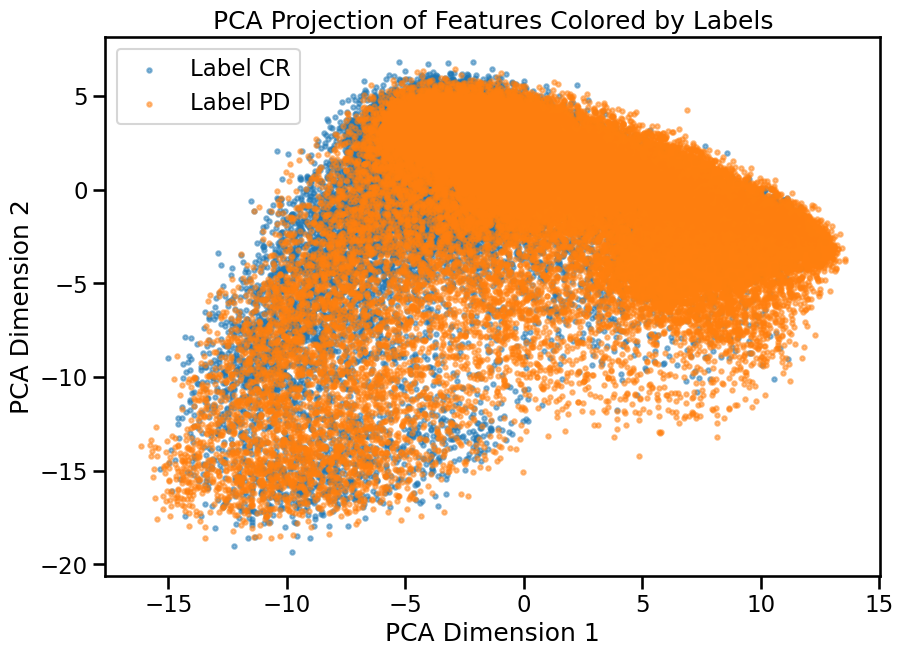

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data for demonstration purposes
features = fae
labels = responses_fae

# Flatten the feature array to 2D (samples, features)
flattened_features = features.reshape(features.shape[0], -1)

# Perform PCA for dimensionality reduction to 2D
pca = PCA(n_components=5)
pca_result = pca.fit_transform(flattened_features)

# Plot the PCA results
plt.figure(figsize=(10, 7))
for label in np.unique(labels):
    plt.scatter(
        pca_result[labels == label, 0],
        pca_result[labels == label, 1],
        label=f"Label {label}",
        alpha=0.5,
        s=10
    )
plt.title("PCA Projection of Features Colored by Labels")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.show()


## Model & Training

In [18]:
import torch

def gumbel_softmax(logits, temperature=1.0, hard=False):
    """
    Differentiable sampling using Gumbel-Softmax.
    """
    gumbels = -torch.empty_like(logits).exponential_().log()  # Gumbel noise
    y = (logits + gumbels) / temperature
    y_soft = y.softmax(dim=-1)

    if hard:
        index = y_soft.max(dim=-1, keepdim=True)[1]
        y_hard = torch.zeros_like(logits).scatter_(-1, index, 1.0)
        y = y_hard - y_soft.detach() + y_soft
    else:
        y = y_soft
    return y

def create_edges_and_weights(attention_matrix, threshold, temperature=0.5, hard=False):
    """
    Use Gumbel-Softmax to create edges and assign weights based on attention values.
    """
    num_nodes = attention_matrix.size(0)
    logits = attention_matrix.view(-1)
    probs = gumbel_softmax(attention_matrix, temperature, hard=hard).view(num_nodes, num_nodes)
    # Create edge_index from probs
    edge_index = (probs > 0.7).nonzero(as_tuple=False).T  # shape (2, num_edges)
    #print(f"Added {edge_index.shape[1]} edges!")

    return edge_index, probs[edge_index[0], edge_index[1]], probs


In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.utils import softmax, add_self_loops, remove_self_loops, coalesce
from torch_geometric.nn import global_mean_pool, global_max_pool, global_add_pool, MessagePassing, TopKPooling


class SparseRandomAttention(nn.Module):
    def __init__(self, embedding_dim, num_heads, num_sparse_connections):
        super(SparseRandomAttention, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_heads = num_heads
        self.head_dim = embedding_dim // num_heads
        self.num_sparse_connections = num_sparse_connections

        assert self.head_dim * num_heads == embedding_dim, "Embedding dimension must be divisible by the number of heads."

        # Linear projections for queries and keys (we skip values since output is not needed)
        self.query_proj = nn.Linear(embedding_dim, embedding_dim)
        self.key_proj = nn.Linear(embedding_dim, embedding_dim)
        self.value_proj = nn.Linear(embedding_dim, embedding_dim)

        # init all parameters
        nn.init.xavier_uniform_(self.query_proj.weight)
        nn.init.xavier_uniform_(self.key_proj.weight)


    def forward(self, embedding_matrix):
        # embedding_matrix: (num_nodes, embedding_dim)
        num_nodes = embedding_matrix.size(0)

        # Project queries and keys
        queries = self.query_proj(embedding_matrix)  # (num_nodes, embedding_dim)
        keys = self.key_proj(embedding_matrix)       # (num_nodes, embedding_dim)

        # Split into multiple heads and reshape for multi-head attention
        queries = queries.view(num_nodes, self.num_heads, self.head_dim).transpose(0, 1)  # (num_heads, num_nodes, head_dim)
        keys = keys.view(num_nodes, self.num_heads, self.head_dim).transpose(0, 1)        # (num_heads, num_nodes, head_dim)

        # Initialize sparse attention weight matrix with zeros
        sparse_attn_weights = torch.zeros(self.num_heads, num_nodes, num_nodes, device=embedding_matrix.device)

        # Generate random sparse connections
        # Randomly sample node indices for each head
        sparse_indices = torch.randint(0, num_nodes, (self.num_heads, num_nodes, self.num_sparse_connections), device=embedding_matrix.device)

        # Loop through each head to compute sparse attention weights
        for i in range(self.num_heads):
            # Select sparse keys for this head
            selected_keys = keys[i][sparse_indices[i]]  # (num_nodes, num_sparse_connections, head_dim)

            # Compute attention scores for selected pairs
            query = queries[i].unsqueeze(1)  # (num_nodes, 1, head_dim)
            attn_scores = torch.bmm(query, selected_keys.transpose(1, 2)).squeeze(1)  # (num_nodes, num_sparse_connections)
            attn_scores = attn_scores / (self.head_dim ** 0.5)  # Scaled dot-product

            # Apply softmax to get sparse attention weights
            #attn_weights = F.softmax(attn_scores, dim=-1)  # (num_nodes, num_sparse_connections)

            # Place sparse attention weights in the larger sparse_attn_weights matrix
            sparse_attn_weights[i].scatter_(1, sparse_indices[i], attn_scores)

        return sparse_attn_weights

class SparseAttention(nn.Module):
    def __init__(self, embedding_dim, num_heads, num_sparse_connections):
        super(SparseAttention, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_heads = num_heads
        self.head_dim = embedding_dim // num_heads
        self.num_sparse_connections = num_sparse_connections

        assert self.head_dim * num_heads == embedding_dim, "Embedding dimension must be divisible by the number of heads."

        # Linear projections for queries and keys
        self.query_proj = nn.Linear(embedding_dim, embedding_dim)
        self.key_proj = nn.Linear(embedding_dim, embedding_dim)

        # Initialize parameters uniformly and multiply by very small weight
        nn.init.xavier_uniform_(self.query_proj.weight)
        nn.init.xavier_uniform_(self.key_proj.weight)

    def forward(self, embedding_matrix):
        # embedding_matrix: (num_nodes, embedding_dim)
        num_nodes = embedding_matrix.size(0)

        # Project queries, keys, and values
        queries = self.query_proj(embedding_matrix)  # (num_nodes, embedding_dim)
        keys = self.key_proj(embedding_matrix)       # (num_nodes, embedding_dim)

        # Split into multiple heads and reshape for multi-head attention
        queries = queries.view(num_nodes, self.num_heads, self.head_dim).transpose(0, 1)  # (num_heads, num_nodes, head_dim)
        keys = keys.view(num_nodes, self.num_heads, self.head_dim).transpose(0, 1)        # (num_heads, num_nodes, head_dim)

        # Initialize sparse attention weight matrix with zeros
        sparse_attn_weights = torch.zeros(self.num_heads, num_nodes, num_nodes, device=embedding_matrix.device)

        # Generate sparse connections based on similarity scores
        for i in range(self.num_heads):
            # Compute similarity scores between queries and all keys
            query = queries[i].unsqueeze(0)  # (num_nodes, 1, head_dim)
            similarity_scores = torch.bmm(query, keys[i].unsqueeze(0).transpose(1, 2)).squeeze(0)  # (num_nodes, num_nodes)
            similarity_scores = similarity_scores / (self.head_dim ** 0.5)  # Scale scores

            # For each node, select indices of the top num_sparse_connections most similar nodes
            top_k_indices = torch.topk(similarity_scores, self.num_sparse_connections, dim=-1).indices  # (num_nodes, num_sparse_connections)

            # Compute attention scores for these top connections
            selected_keys = keys[i][top_k_indices]  # (num_nodes, num_sparse_connections, head_dim)
            attn_scores = torch.bmm(query.transpose(0,1), selected_keys.transpose(1, 2)).squeeze(1)  # (num_nodes, num_sparse_connections)
            attn_scores = attn_scores / (self.head_dim ** 0.5)

            # Apply softmax to get sparse attention weights
            #attn_weights = F.softmax(attn_scores, dim=-1)  # (num_nodes, num_sparse_connections)

            # Place sparse attention weights in the larger sparse_attn_weights matrix
            sparse_attn_weights[i].scatter_(1, top_k_indices, attn_scores)

        return sparse_attn_weights


class MultiheadNodeAttention(nn.Module):
    def __init__(self, embedding_dim, num_heads, num_sparse_connections):
        super(MultiheadNodeAttention, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_heads = num_heads
        self.head_dim = embedding_dim // num_heads

        assert self.head_dim * num_heads == embedding_dim, "Embedding dimension must be divisible by the number of heads."

        # Linear projections for queries, keys, and values
        self.query_proj = nn.Linear(embedding_dim, embedding_dim)
        self.key_proj = nn.Linear(embedding_dim, embedding_dim)


    def forward(self, embedding_matrix):
        # embedding_matrix: (num_nodes, embedding_dim)
        num_nodes = embedding_matrix.size(0)

        # Project queries, keys, and values
        queries = self.query_proj(embedding_matrix)  # (num_nodes, embedding_dim)
        keys = self.key_proj(embedding_matrix)      # (num_nodes, embedding_dim)

        # Split into multiple heads and reshape for multi-head attention
        queries = queries.view(num_nodes, self.num_heads, self.head_dim).transpose(0, 1)  # (num_heads, num_nodes, head_dim)
        keys = keys.view(num_nodes, self.num_heads, self.head_dim).transpose(0, 1)        # (num_heads, num_nodes, head_dim)

        # Scaled dot-product attention
        # Compute attention scores
        attn_scores = torch.bmm(queries, keys.transpose(1, 2)) / (self.head_dim ** 0.5)  # (num_heads, num_nodes, num_nodes)
        #attn_weights = F.softmax(attn_scores, dim=-1)  # Normalize across the last dimension

        return attn_scores

def custom_add_self_loops(num_nodes, updated_edge_index, edge_weights, probs):
    # Add self-loops to the edge index
  self_loop_index = torch.arange(num_nodes, dtype=torch.long, device=updated_edge_index.device).unsqueeze(0)
  self_loops = torch.cat([self_loop_index, self_loop_index], dim=0)

  # Concatenate the self-loops to updated_edge_index
  updated_edge_index = torch.cat([updated_edge_index, self_loops], dim=1)

  # Add weights for the self-loops (e.g., set them to 1 or some other value)
  self_loop_weights = probs[self_loop_index, self_loop_index].squeeze(0)

  edge_weights = torch.cat([edge_weights, self_loop_weights])
  return updated_edge_index, edge_weights

class DynamicGATLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, threshold=0.0, heads=1, concat=True, negative_slope=0.2, dropout=0.0, num_sparse_connections=128):
        super(DynamicGATLayer, self).__init__(aggr='mean')
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.heads = heads
        self.concat = concat
        self.negative_slope = negative_slope
        self.dropout = dropout
        self.multihead_attn = SparseAttention(in_channels, heads, num_sparse_connections=num_sparse_connections)

        # Set on the fly
        self.attention_scores = None

        # Learnable weights
        self.update_mlp_msg_trf = nn.Sequential(
            nn.Linear(in_channels*2, in_channels*2 // 2, bias=False),
            nn.LeakyReLU(negative_slope=negative_slope),
            nn.Linear(in_channels*2 // 2, out_channels, bias=False)
        )

        self.update_mlp_msg_att = nn.Sequential(
            nn.Linear(in_channels*2, in_channels*2 // 2, bias=False),
            nn.LeakyReLU(negative_slope=negative_slope),
            nn.Linear(in_channels*2 // 2, out_channels, bias=False)
        )

        self.update_mlp_neighbor = nn.Sequential(
            nn.Linear(in_channels*2, in_channels*2 // 2, bias=False),
            nn.LeakyReLU(negative_slope=negative_slope),
            nn.Linear(in_channels*2 // 2, in_channels, bias=False)
        )

        self.update_mlp_att = nn.Sequential(
            nn.Linear(in_channels*2, in_channels*2 // 2, bias=False),
            nn.LeakyReLU(negative_slope=negative_slope),
            nn.Linear(in_channels*2 // 2, in_channels, bias=False)
        )

        # # Learnable attention threshold, arbitrary
        self.threshold = torch.tensor(threshold)

        self.reset_parameters()

    def reset_parameters(self):
        # Initialize Regressor weights
        for layer in self.update_mlp_msg_trf:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                if layer.bias is not None:
                    layer.bias.data.fill_(0.01)

        # Initialize Classifier weights
        for layer in self.update_mlp_msg_att:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                if layer.bias is not None:
                    layer.bias.data.fill_(0.01)

        # Initialize Classifier weights
        for layer in self.update_mlp_neighbor:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                if layer.bias is not None:
                    layer.bias.data.fill_(0.01)

        # Initialize Classifier weights
        for layer in self.update_mlp_att:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                if layer.bias is not None:
                    layer.bias.data.fill_(0.01)

    def forward(self, x, decoupled_emb, edge_index, mask, attention_init):
        out, updated_edge_index, edge_penalty, attention_returned, decoupled_emb, edge_weights = self.dynamic_propagate(x, decoupled_emb, edge_index, mask, attention_init)
        return out, updated_edge_index, decoupled_emb, edge_penalty, attention_returned, edge_weights

    def dynamic_propagate(self, x, decoupled_emb, edge_index, mask, attention_init):
        '''Custom propogate implementation to handle dynamic edge_index '''
        edge_index, _ = remove_self_loops(edge_index)
        num_nodes = x.size(0)
        edge_penalty = 0.0

        # Compute new edges and penalties for each node
        attention_scores = self.multihead_attn(decoupled_emb)
        attention_scores = attention_scores.sum(dim=0) #+ attention_init

        temperature = 0.5
        hard = False
        new_edge_index, edge_weights, probs = create_edges_and_weights(attention_scores, self.threshold, temperature, hard)

        updated_edge_index = torch.cat([edge_index, new_edge_index], dim=1)
        edge_weights = torch.cat((probs[edge_index[0], edge_index[1]], edge_weights))

        updated_edge_index, edge_weights = custom_add_self_loops(num_nodes, updated_edge_index, edge_weights, probs)

        # Coalesce to remove duplicate edges and sum their weights
        updated_edge_index, edge_weights = coalesce(
            updated_edge_index, edge_attr=edge_weights, num_nodes=num_nodes
        )

        if mask is not None:
          # **Filter edges based on the mask**
          valid_nodes = mask.nonzero(as_tuple=True)[0]
          valid_node_mask = (mask[updated_edge_index[0]] & mask[updated_edge_index[1]])
          updated_edge_index_masked = updated_edge_index[:, valid_node_mask]
          edge_weights_masked = edge_weights[valid_node_mask]
        else:
          updated_edge_index_masked = updated_edge_index
          edge_weights_masked = edge_weights

        # Calculate messages using the updated edge index
        messages = self.propagate(edge_index=updated_edge_index_masked, x=x, edge_weights=edge_weights_masked, mode='val')
        att_messages = self.propagate(edge_index=updated_edge_index, x=decoupled_emb, edge_weights=edge_weights, mode='att')

        # penalizes entropy, rewards peaked attention distribution
        edge_penalty += -torch.sum(probs * torch.log(probs + 1e-10))

        return messages, updated_edge_index, edge_penalty, attention_scores, att_messages, edge_weights

    def message(self, x_i, x_j, edge_weights, edge_index_i, edge_index_j, mode, **kwargs):
        '''
        Args:
        - x_i: neighbor node feature (target)
        - x_j: source node feature
        - edge_weights: edge weights
        - mode: 'val' or 'att', (whether to use MLP for passing value embeddings or attention embeddings)
        - kwargs: additional arguments for propagation

        Returns:
        - message: message that is passed from source node to target node
        '''
        source_target = torch.cat([x_i, x_j], dim=1)
        # value embeddings
        if(mode == 'val'):
          message = self.update_mlp_neighbor(source_target)
          return edge_weights.view(-1,1)*message

        # attention embeddings also shared since attention can be influenced at the sub-graph level
        elif(mode == 'att'):
          message = self.update_mlp_att(source_target)
          return edge_weights.view(-1,1)*message
        else:
          # fallback, should not get called
          return x_j

    def update(self, aggr_out, x, mode):
        '''
        Args:
        - aggr_out: aggregated messages from neighbors
        - x: node features
        - mode: 'val' or 'att', (whether to use MLP for passing value embeddings or attention embeddings)

        Returns:
        - aggr_out: updated node features
        '''
        aggr_out_x = torch.cat([aggr_out, x], dim=1)
        if(mode == 'val'):
          aggr_out = self.update_mlp_msg_trf(aggr_out_x)
        elif(mode == 'att'):
          aggr_out = self.update_mlp_msg_att(aggr_out_x)
        else:
          pass # fallback should not get called
        return aggr_out



class ShallowAttentionEmbedding(nn.Module):
    '''
    Args:
    - num_embeddings: number of genes to embed
    - embedding_dim: dimension of the embedding vector
    - init_embeddings: pre-trained embeddings for genes

    Returns:
    - embedding: embedding matrix of shape (num_embeddings, embedding_dim)
    '''
    def __init__(self, num_embeddings, embedding_dim, init_embeddings=None):
        super(ShallowAttentionEmbedding, self).__init__()
        # Create embedding via indexing
        if init_embeddings is not None:
            self.embedding = nn.Embedding.from_pretrained(init_embeddings, freeze=False)
        else:
          self.embedding = nn.Embedding(num_embeddings, embedding_dim)

    def forward(self, x):
        indices = (torch.arange(x.size(0), device=self.embedding.weight.device) % self.embedding.num_embeddings).unsqueeze(0)
        out = self.embedding(indices)
        return self.embedding(indices).squeeze(0)


class ShallowGeneEmbedding(nn.Module):
    '''
    Args:
    - input_dim: dimension of the input vector
    - embedding_dim: dimension of the embedding vector
    - init_embeddings: pre-trained embeddings for genes

    Returns:
    - embedding: embedding matrix of shape (input_dim, embedding_dim)
    '''
    def __init__(self, input_dim, embedding_dim, init_embeddings=None):
        super(ShallowGeneEmbedding, self).__init__()
        self.embedding = nn.Linear(input_dim, embedding_dim, bias=False)
        self.init_embeddings = init_embeddings

    def forward(self, x):
        if(self.init_embeddings is not None):
          return self.embedding(x) + self.init_embeddings
        else:
          return self.embedding(x)

# Example loss function for masked nodes
def loss_fn(pred, target):
    return F.mse_loss(pred, target)

# cross entropy loss function form
def loss_fn_ce(pred, target, label_smoothing=0.0):
    return F.cross_entropy(pred, target, label_smoothing=label_smoothing) #weight=torch.tensor([3, 2], device=pred.device)

loss_fn_ce = nn.CrossEntropyLoss()

class DynamicGAT(torch.nn.Module):
    '''
    Stacked DynamicGAT layers with trainable heads for downstream regression and classification tasks.
    '''

    def __init__(self, num_genes, in_channels, embedding_dim, hidden_channels, out_channels, num_layers, threshold, n_classes=4, heads=4, dropout_prob=0.0, negative_slope=0.2, num_sparse_connections=128):
        super(DynamicGAT, self).__init__()
        self.embedding = ShallowGeneEmbedding(input_dim=in_channels, embedding_dim=embedding_dim, init_embeddings=None)
        self.decoupled_embedding = ShallowAttentionEmbedding(num_embeddings=num_genes, embedding_dim=embedding_dim, init_embeddings=sc_embed)  # separate embedding

        self.layers = nn.ModuleList()
        self.layer_norms_val = nn.ModuleList()
        self.layer_norms_att = nn.ModuleList()
        self.skip_connections = nn.ModuleList()
        self.dropouts = nn.ModuleList()
        self.negative_slope = negative_slope

        for i in range(num_layers):
            if i == 0:
                self.layers.append(DynamicGATLayer(embedding_dim, hidden_channels, threshold=threshold, heads=heads, negative_slope=negative_slope, num_sparse_connections=num_sparse_connections))
                self.skip_connections.append(
                      nn.Linear(embedding_dim, hidden_channels, bias=False),
                    )
            elif i == num_layers - 1:
                self.layers.append(DynamicGATLayer(hidden_channels, out_channels, threshold=threshold, heads=heads, negative_slope=negative_slope, num_sparse_connections=num_sparse_connections))
                self.skip_connections.append(
                    nn.Linear(embedding_dim, out_channels, bias=False),
                )
            else:
                self.layers.append(DynamicGATLayer(hidden_channels, hidden_channels, threshold=threshold, heads=heads, negative_slope=negative_slope, num_sparse_connections=num_sparse_connections))
                self.skip_connections.append(
                        nn.Linear(embedding_dim, hidden_channels, bias=False)
                )

            # DynamicGAT mulitplies output dim by heads

            # Add Layer Normalization and Dropout for each layer
            self.layer_norms_val.append(nn.LayerNorm(hidden_channels if i < num_layers - 1 else out_channels))
            self.layer_norms_att.append(nn.LayerNorm(hidden_channels if i < num_layers - 1 else out_channels))
            self.dropouts.append(nn.Dropout(p=dropout_prob))

        # Regressor with Uniform Initialization
        self.regressor = nn.Sequential(
            nn.Linear(out_channels, out_channels//2, bias=True),
            nn.LeakyReLU(negative_slope=negative_slope),
            nn.Dropout(dropout_prob),
            nn.Linear(out_channels//2, 1, bias=True)
        )

        self.classifier = nn.Sequential(
            nn.Linear(out_channels, out_channels//2, bias=True),
            nn.LeakyReLU(negative_slope=negative_slope),  # LeakyReLU to prevent dead neurons
            nn.Dropout(dropout_prob),
            nn.Linear(out_channels//2, n_classes, bias=True),
        )

        # stack DiffPool layers together
        self.reset_parameters()
        self.num_genes = num_genes


    def reset_parameters(self):
        # Initialize Regressor weights
        for layer in self.regressor:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                if layer.bias is not None:
                    layer.bias.data.fill_(0.01)

        # Initialize Classifier weights
        for layer in self.classifier:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                if layer.bias is not None:
                    layer.bias.data.fill_(0.01)

        for skip in self.skip_connections:
            if isinstance(skip, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                if layer.bias is not None:
                    layer.bias.data.fill_(0.01)

    def forward(self, x, edge_index, batch, mask=None, labels=None, response=None, compute_loss=False, return_edges=False):

        decoupled_emb = self.decoupled_embedding(x)
        x = self.embedding(x.view(self.num_genes, -1))

        x_init = x
        loss = 0.0
        edge_penalities = 0.0
        ce_loss = 0.0

        attention_init = torch.zeros(self.num_genes, self.num_genes, device=x.device, requires_grad=True)
        for i, layer in enumerate(self.layers):
            x, edge_index, decoupled_emb, edge_penality, attention_init, edge_weights = layer(x, decoupled_emb, edge_index, mask=mask, attention_init=attention_init)
            # Apply Layer Normalization and Dropout

            x = self.layer_norms_val[i](x)
            x = self.skip_connections[i](x_init) + x
            x = self.dropouts[i](x)

            decoupled_emb = self.layer_norms_att[i](decoupled_emb)
            decoupled_emb = self.dropouts[i](decoupled_emb)

            # Accumulate edge penalties
            edge_penalities += edge_penality

        self.attention_final = attention_init # for use after forward pass
        self.x_final = x # for use after forward pass

        if compute_loss:
            if(mask is not None):
              num_masked_nodes = mask.numel() - mask.sum().item()
              for node_idx in (~mask).nonzero(as_tuple=True)[0]:
                  # Pool the neighborhood of the masked node

                  neighbor_idxs = edge_index[1][edge_index[0] == node_idx]  # Get neighbors of the masked node
                  # print(neighbor_idxs.shape)

                  if neighbor_idxs.numel() == 0:  # No neighbors

                      # Assign a high differentiable penalty loss for isolated nodes
                      node_loss = loss_fn(x*0, labels[node_idx].unsqueeze(0))
                  else:

                      # Compute the neighborhood embedding if neighbors exist
                      neighbor_embeddings = x[neighbor_idxs]

                      # apply attention from attention_init and sum
                      weights = F.softmax(attention_init[node_idx, neighbor_idxs].unsqueeze(0), dim=1)
                      pooled_embedding = (weights @ neighbor_embeddings)
                      if torch.isnan(pooled_embedding).any():
                          # Handling NaN values
                          continue

                      # Make prediction for the current masked node
                      pred = self.regressor(pooled_embedding)  # Adding batch dimension for single node

                      # Compute the loss for the current masked node
                      node_loss = loss_fn(pred, labels[node_idx].unsqueeze(0))

                  # Accumulate the loss for each masked node
                  loss += node_loss if not torch.isnan(node_loss) else 0.0
              loss /= (num_masked_nodes if num_masked_nodes > 0 else 1)

            x = global_add_pool(x, batch)
            if(response is not None):
                response = response.view(1,-1)
                response_idx = torch.argmax(response, dim=-1)
                logits = self.classifier(x).view(1,-1)
                ce_loss = loss_fn_ce(logits, response_idx)

            if(return_edges):
                return x, loss, edge_penalities, ce_loss, edge_index

            return x, loss, edge_penalities, ce_loss

        x = global_add_pool(x, batch)
        if(return_edges):
            return x, edge_index
        return x


In [20]:

import torch
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.utils import add_self_loops
import torch.nn as nn
from tqdm import tqdm

# Function to initialize a random edge_index for a single cell graph of genes
def initialize_edge_index(expression_matrix, threshold=0.5, random=False):
    """
    Create an edge index based on gene correlations across all cells.

    Args:
    - expression_matrix (torch.Tensor): Expression matrix of shape (num_cells, num_genes).
    - threshold (float): Correlation threshold for creating edges.

    Returns:
    - edge_index (torch.Tensor): Edge index of shape (2, num_edges).
    """

    # if random, create random edge list
    if(random):
        num_cells, num_genes = expression_matrix.shape
        edge_index = torch.randint(low=0, high=num_genes, size=(2, num_cells))
        return edge_index

    num_cells, num_genes = expression_matrix.shape
    expression_mean = expression_matrix.mean(dim=0, keepdim=True)
    expression_std = expression_matrix.std(dim=0, keepdim=True)

    # Normalize expression matrix
    normalized_matrix = (expression_matrix - expression_mean) / (expression_std + 1e-8)

    # Compute correlation between genes
    correlation_matrix = torch.mm(normalized_matrix.t(), normalized_matrix) / num_cells

    # Apply threshold to create adjacency matrix
    adjacency_matrix = correlation_matrix > threshold
    adjacency_matrix.fill_diagonal_(False)  # Remove self-loops

    # Find indices where correlation exceeds threshold
    edge_sources, edge_targets = adjacency_matrix.nonzero(as_tuple=True)
    edge_index = torch.stack([edge_sources, edge_targets], dim=0)


    return edge_index

# Function to create node mask and labels for prediction
def create_mask_and_labels(cell_data_embedded, num_genes, mask_ratio=0.30):
    """
    Generate a mask and labels for nodes where predictions are needed.

    Args:
    - num_genes (int): Number of nodes (genes).
    - mask_ratio (float): Ratio of nodes to be masked for prediction.

    Returns:
    - mask (torch.Tensor): Boolean tensor indicating masked nodes.
    - labels (torch.Tensor): Labels for the masked nodes.
    """
    mask = torch.ones(num_genes, dtype=torch.bool)
    num_masked_nodes = int(num_genes * mask_ratio)
    masked_indices = torch.randperm(num_genes)[:num_masked_nodes]
    mask[masked_indices] = False

    # Generate random labels for masked nodes (for demonstration, replace with real labels)
    labels = cell_data_embedded[:,0]  # Assuming binary labels; modify as needed
    labels[~mask] = -1  # Set labels for unmasked nodes to -1 (ignore index)

    return mask, labels

# Convert each cell to a PyG Data object
def create_graph_data(cell_data, response, edge_index, mask_ratio=0.30):
    """

    Args:
    - cell_data (torch.Tensor): Gene expression data for a single cell.
    - edge_index (torch.Tensor): Edge index of shape (2, num_edges).
    - response (float): Response value for the cell (SD, CR, PR, PD).

    Returns:
    - graph_data (Data): PyG Data object representing the cell graph.
    """
    # Embed the cell data (gene features)
    mask_ratio = mask_ratio
    cell_data_embedded = cell_data.unsqueeze(-1)  # Shape: [2000, 1]

    # Generate mask and labels for this cell's graph
    mask, labels = create_mask_and_labels(cell_data_embedded, cell_data.shape[0], mask_ratio)

    # Create Data object with additional attributes
    response = torch.tensor(response, dtype=torch.float32).unsqueeze(0)

    graph_data = Data(x=cell_data_embedded, edge_index=edge_index, mask=mask, y=labels, response=response)
    return graph_data


def dl_from_gex(fae, responses, indices, num_cells=50000, threshold=0.5, device=None, mask_ratio=0.3, batch_size=1, random=False):
  """
  Creates data loaders from gene expression graph data.

  Args:
  - fae: sparse gene expression matrix
  - responses: classification label of each cell
  - indices: based on split

  Returns:
  - data_loader: data loader for batching
  """
  # Assuming data shape (85000, 2000), where each row represents a cell and each column is a gene feature
  data = torch.Tensor(fae[indices, :, :])  # Replace with actual data

  responses = responses[indices, :]
  graph_dataset = []
  num_genes = data.shape[1]
  edge_index = initialize_edge_index(data[:,:,0], threshold, random)

  #sample_indices = np.random.permutation(data.shape[0])
  for i in tqdm(range(data.shape[0])):  # Iterate over each cell
      cell_data = data[i]  # Shape: [2000] for one cell's gene expression
      graph_data = create_graph_data(cell_data, responses[i], edge_index, mask_ratio=mask_ratio)
      graph_dataset.append(graph_data)
    # Create DataLoader for batching

  data_loader = DataLoader(graph_dataset, batch_size=batch_size, shuffle=True)
  return data_loader, edge_index

In [21]:
import wandb
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt
import gc

def validate(model, batch, compute_loss=True):
  """
  Run validation on a given batch.

  Args:
  - model: PyTorch model.
  - batch: Batch of data.
  - compute_loss: Whether to compute the loss or just return computed neighborhoods

  Returns:
  - output: Model output.
  - loss: Loss value.
  - additional based on arguments
  """
  model.eval()
  with torch.no_grad():
    if(not compute_loss):
      output, edge_index = process_batch(model, batch, compute_loss)
    else:
      output, loss, edge_penalities, ce_loss, edge_index = process_batch(model, batch, compute_loss)

  model.train()
  if(not compute_loss):
    return output, edge_index
  return output, loss, edge_penalities, ce_loss, edge_index

def process_batch(model, batch, compute_loss=True):
    """
    Process batch for training step.

    Args:
    - model: PyTorch model.
    - batch: Batch of data.
    - compute_loss: Whether to compute the loss or just return computed neighborhoods

    Returns:
    - model output
    - loss (all losses)
    """
    # Move data to the device
    # Each `batch` contains batched data with attributes: batch.x, batch.edge_index, batch.batch
    x = batch.x  # Node features
    edge_index = batch.edge_index  # Batched edge indices
    batch_indices = batch.batch  # Batch index for each node
    mask = batch.mask
    labels = batch.y
    response = batch.response
    # Pass through the model
    if(not compute_loss):
      output, edge_index = model(x, edge_index, batch_indices, mask=mask, labels=labels, response=response, compute_loss=compute_loss, return_edges=True)
      return output, edge_index
    else:
      output, loss, edge_penalities, ce_loss, edge_index = model(x, edge_index, batch_indices, mask=mask, labels=labels, response=response, compute_loss=compute_loss, return_edges=True)
      return output, loss, edge_penalities, ce_loss, edge_index

def train(model, optimizer, scheduler, data_loader, val_data_loader, num_epochs, effective_batch_size, print_interval, device, num_repeats=1, reg_nl=1e0, reg_edge=1e-1, reg_ce=1e2):
    """
    Train the model for a specified number of epochs.

    Args:
    - model: PyTorch model.
    - optimizer: PyTorch optimizer.
    - data_loader: DataLoader for training data.
    - num_epochs: Number of training epochs.
    - hyperparams

    Returns:
    - N/A
    """
    print(f"Training with weights NL: {reg_nl}, CE: {reg_ce}, E: {reg_edge}")
    model.train()
    optimizer.zero_grad()
    for idx, epoch in enumerate(range(num_epochs)):
      for batch_idx, batch in enumerate(tqdm(data_loader, desc=f"Epoch {epoch+1}/{num_epochs}")):
          batch = batch.to(device)

          for j in range(num_repeats):
            # permute mask in batch repeat times
            batch.mask = batch.mask[torch.randperm(batch.mask.shape[0])]
            output, loss, edge_penalities, ce_loss, edge_index = process_batch(model, batch)
            total_loss = reg_nl * loss + reg_edge * edge_penalities + reg_ce * ce_loss

            total_loss.backward()


          # Print layer names and their gradients
          # for name, param in model.named_parameters():
          #     if param.grad is not None:
          #         print(f"Layer: {name} | Gradient: {torch.norm(param.grad)}")
          #     else:
          #         print(f"Layer: {name} | Gradient: None")

          if (batch_idx + 1) % effective_batch_size == 0:
              optimizer.step()
              optimizer.zero_grad()
              wandb.log({
                'train_loss': total_loss,
                'node_loss': loss,
                'edge_loss': edge_penalities,
                'cross_entropy_loss': ce_loss,
                'num_edges': edge_index.shape[1]
              })


          del batch, output, loss, edge_penalities, ce_loss, total_loss, edge_index
          torch.cuda.empty_cache()
          gc.collect()

          scheduler.step()

          if batch_idx % (print_interval*effective_batch_size) == 0:
              model.eval()
              val_batch = next(val_data_loader)
              val_batch = val_batch.to(device)

              val_output, val_loss, val_edge_penalities, val_ce_loss, val_edge_index = validate(model, val_batch)
              val_total_loss = reg_nl * val_loss + reg_edge * val_edge_penalities + reg_ce * val_ce_loss

              wandb.log({
                  'val_loss': val_total_loss,
                  'val_node_loss': val_loss,
                  'val_edge_loss': val_edge_penalities,
                  'val_cross_entropy_loss': val_ce_loss,
                  'val_num_edges': val_edge_index.shape[1]
              })

              model.train()
              # Clear GPU memory for the validation batch
              del val_batch, val_output, val_loss, val_edge_penalities, val_ce_loss, val_total_loss
              torch.cuda.empty_cache()
              gc.collect()

def get_splits(num_cells, train_ratio, val_ratio, test_ratio):

  # Calculate the sizes for each split
  train_size = int(train_ratio * num_cells)
  val_size = int(val_ratio * num_cells)
  test_size = num_cells - train_size - val_size  # Adjust for any rounding issues

  # Generate random train, validation, and test indices
  train_indices, val_indices, test_indices = torch.utils.data.random_split(
      range(num_cells), [train_size, val_size, test_size]
  )
  return train_indices, val_indices, test_indices

import networkx as nx
import matplotlib.pyplot as plt

def visualize_edges(edge_index):
  """
  Visualizes the edges in a graph given the edge_index matrix.

  Args:
  - edge_index (torch.Tensor): Edge index of shape (2, num_edges).

  Returns:
  - N/A
  """
  # Create a directed graph (can change to undirected if needed)
  G = nx.Graph()  # Use nx.Graph() if the graph is undirected

  # Add edges from edge_index
  for src, dst in edge_index.T:
      G.add_edge(src, dst)

  # Draw the graph
  plt.figure(figsize=(10, 8))
  pos = nx.spring_layout(G)  # Layout for a nicer visualization
  nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, font_color="white")
  nx.draw_networkx_edge_labels(G, pos, edge_labels={(src, dst): f"{src}->{dst}" for src, dst in G.edges()})
  plt.show()

# Custom cosine annealing scheduler with a minimum learning rate
class CosineAnnealingWithMinLRScheduler(torch.optim.lr_scheduler.LambdaLR):
    def __init__(self, optimizer, num_warmup_steps, num_hold_steps, num_training_steps, init_lr=1e-3, min_lr=5e-4, last_epoch=-1):
        def lr_lambda(current_step):
            if current_step < num_warmup_steps:
                return (float(current_step) / float(max(1, num_warmup_steps)))
            if current_step < num_warmup_steps + num_hold_steps:
                return 1.0
            progress = float(current_step - (num_warmup_steps + num_hold_steps)) / float(max(1, num_training_steps - (num_warmup_steps + num_hold_steps)))
            cosine_decay_lr = 0.5 * (1 + torch.cos(torch.tensor(torch.pi * progress)))
            return max(min_lr/init_lr, cosine_decay_lr)

        super(CosineAnnealingWithMinLRScheduler, self).__init__(optimizer, lr_lambda, last_epoch)


In [22]:
def balance_indices(responses, indices):
  unique, counts = np.unique(responses, return_counts=True)

  # Determine the minimum count across all classes
  min_count = np.min(counts)

  # Collect indices to ensure equal counts of each class
  balanced_indices = []
  for cls in unique:
      cls_indices = np.where(responses == cls)[0]
      sampled_cls_indices = np.random.choice(cls_indices, min_count, replace=False)
      balanced_indices.extend(sampled_cls_indices)

  return np.array(indices)[np.array(balanced_indices)]

def prepare_fae(num_samples, fae, responses_fae):
  # indices = np.random.choice(fae.shape[0], num_samples, replace=False)
  # Convert patient_id and Response_6m to numpy arrays for processing
  all_patient_ids = adata_selected_genes.obs['patient_id'].values
  responses = adata_selected_genes.obs['Response_6m'].values

  # Get unique patients and randomly sample half of them
  all_unique_patients = np.unique(all_patient_ids)
  selected_patients = np.random.choice(all_unique_patients, size=len(all_unique_patients) // 2, replace=False)

  # Filter data for the selected patients
  selected_mask = np.isin(all_patient_ids, selected_patients)
  filtered_responses = responses[selected_mask]

  # Create a DataFrame to facilitate stratified sampling
  filtered_indices = np.where(selected_mask)[0]
  filtered_data = pd.DataFrame({
      'index': filtered_indices,
      'Response_6m': filtered_responses
  })

  # Perform stratified sampling to ensure equal representation of Response_6m categories
  sampled_indices = (
      filtered_data.groupby('Response_6m')
      .apply(lambda x: x.sample(min(len(x), len(filtered_data) // len(filtered_data['Response_6m'].unique()))))
      .reset_index(drop=True)['index']
      .values
  )

  # Convert to a list if needed
  indices = sampled_indices.tolist()

  # Response_30d, Response_3m, Response_6m
  keys = adata.obs.keys()
  fae_sampled = fae[indices]
  responses_sampled = np.array(responses_fae[indices].values.tolist())
  patient_ids_sampled = all_patient_ids[indices]

  balanced_indices = balance_indices(responses_sampled, indices)
  not_in_indices = np.setdiff1d(np.arange(fae.shape[0]), balanced_indices)
  fae_balanced = fae[balanced_indices]
  responses_balanced = responses[balanced_indices]
  patient_ids_selected = all_patient_ids[balanced_indices]

  unique_patients, counts_patients = np.unique(patient_ids_selected, return_counts=True)
  print(f"Patient class distribution: {dict(zip(unique_patients, counts_patients))}")

  # Verify the new distribution of responses
  unique_balanced, counts_balanced = np.unique(responses_balanced, return_counts=True)
  print(f"Balanced class distribution: {dict(zip(unique_balanced, counts_balanced))}")
  one_hot_encoder = OneHotEncoder()
  responses_one_hot = one_hot_encoder.fit_transform(responses_balanced.reshape(-1, 1)).toarray()

  return fae_balanced, responses_one_hot, balanced_indices, not_in_indices, unique_patients, np.setdiff1d(all_unique_patients, unique_patients), one_hot_encoder

In [23]:
# 2389 genes
import itertools
import numpy as np
from sklearn.preprocessing import OneHotEncoder

torch.set_printoptions(threshold=10000)  # Set threshold to a high number to display full tensor

# randomly sample rows from fae
num_samples = 60000
fae_sampled, responses_one_hot_sampled, indices, not_in_indices, patients_sampled, not_in_patients, one_hot_encoder = prepare_fae(num_samples, fae, responses_fae)

#Response_30d, Response_3m, Response_6m
keys = adata.obs.keys()

num_cells = fae_sampled.shape[0]
num_genes = fae_sampled.shape[1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sc_embed = sc_embed.to(device)

# Initialize GAT model
batch_size = 1
effective_batch_size = 16
n_features = 4
embedding_dim = 512
hidden_dim = 512
output_dim = 512
num_layers = 4
lr = 5e-4
num_epochs = 1
heads = 4
print_interval = 10
threshold = 0.5 # correlation threshold for init edges
att_threshold = 0.3 #1/(num_genes**2) arbitrary
reg_edge = 0.0
reg_ce = 1e0
reg_nl = 1e0
n_classes = 2
num_sparse_connections = min(512, num_genes)
dropout_prob = 0.1
random = False
negative_slope = 0.02
mask_ratio = 0.3
n_repeats=1

# get train, test split indcies for # cells
train_idx, val_idx, test_idx = get_splits(num_cells, 0.8, 0.05, 0.15)


train_data_loader, init_train_edge_index = dl_from_gex(fae_sampled, responses_one_hot_sampled, train_idx, num_cells=num_cells, threshold=threshold, device=device, mask_ratio=mask_ratio, batch_size=batch_size, random=random)
val_data_loader, init_val_edge_index = dl_from_gex(fae_sampled, responses_one_hot_sampled, val_idx, num_cells=num_cells, threshold=threshold, device=device, mask_ratio=mask_ratio, batch_size=batch_size, random=random)
val_data_loader = itertools.cycle(val_data_loader)
test_data_loader, init_test_edge_index = dl_from_gex(fae_sampled, responses_one_hot_sampled, test_idx, num_cells=num_cells, threshold=threshold, device=device, mask_ratio=mask_ratio, batch_size=batch_size, random=random)
print(init_train_edge_index.shape, init_val_edge_index.shape, init_test_edge_index.shape)

model = DynamicGAT(num_genes=num_genes, in_channels=n_features, embedding_dim=embedding_dim, hidden_channels=hidden_dim, out_channels=output_dim, num_layers=num_layers, n_classes=n_classes, threshold=att_threshold, heads=heads, num_sparse_connections=num_sparse_connections, negative_slope=negative_slope, dropout_prob=dropout_prob).to(device)
# print total number of trainable parameters
print(f"Total number of trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)

print(f"Training on patients {patients_sampled}")
print(f"Evaluating on patients: {not_in_patients}")


Patient class distribution: {'Pt011': 1202, 'Pt013': 1682, 'Pt015': 2992, 'Pt016': 2777, 'Pt025': 5223, 'Pt026': 4075, 'Pt125': 510, 'Pt129': 1363, 'Pt245': 3723, 'Pt253': 5537, 'Pt282': 4332}
Balanced class distribution: {'CR': 16708, 'PD': 16708}


100%|██████████| 5014/5014 [00:00<00:00, 7421.91it/s]


torch.Size([2, 506]) torch.Size([2, 600]) torch.Size([2, 562])
Total number of trainable parameters: 16498435
Training on patients ['Pt011' 'Pt013' 'Pt015' 'Pt016' 'Pt025' 'Pt026' 'Pt125' 'Pt129' 'Pt245'
 'Pt253' 'Pt282']
Evaluating on patients: ['Pt010' 'Pt014' 'Pt031' 'Pt079' 'Pt110' 'Pt115' 'Pt116' 'Pt237' 'Pt263'
 'Pt276' 'Pt375']


In [24]:
print(model)

DynamicGAT(
  (embedding): ShallowGeneEmbedding(
    (embedding): Linear(in_features=4, out_features=512, bias=False)
  )
  (decoupled_embedding): ShallowAttentionEmbedding(
    (embedding): Embedding(961, 512)
  )
  (layers): ModuleList(
    (0-3): 4 x DynamicGATLayer(512, 512)
  )
  (layer_norms_val): ModuleList(
    (0-3): 4 x LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (layer_norms_att): ModuleList(
    (0-3): 4 x LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (skip_connections): ModuleList(
    (0-3): 4 x Linear(in_features=512, out_features=512, bias=False)
  )
  (dropouts): ModuleList(
    (0-3): 4 x Dropout(p=0.1, inplace=False)
  )
  (regressor): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.02)
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=256, out_features=1, bias=True)
  )
  (classifier): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)


In [25]:
num_training_steps = num_epochs * len(train_data_loader)
num_warmup_steps = int(0.05 * num_training_steps)  # 1% warmup
num_hold_steps = int(0.1 * num_training_steps)  # 10% hold
min_lr = 1e-5  # Minimum learning rate you want to set

scheduler = CosineAnnealingWithMinLRScheduler(optimizer, num_warmup_steps, num_hold_steps, num_training_steps, min_lr=min_lr)

In [ ]:
#wandb.login(key='41b6313df9326b920756d1ecc35bacd177d53fd7')
wandb.init()
train(model, optimizer, scheduler, train_data_loader, val_data_loader, num_epochs, effective_batch_size, print_interval, device, n_repeats, reg_nl, reg_edge, reg_ce)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: skadaba (skadaba-stanford-university). Use `wandb login --relogin` to force relogin


Training with weights NL: 1.0, CE: 1.0, E: 0.0


Epoch 1/1:   1%|          | 311/26732 [04:19<6:05:09,  1.21it/s]

## Analysis of emergent GRNs

In [27]:
import numpy as np

def get_connected_targets(edge_array, source_node):
    """
    Get connected targets for a given source node in an edge array.

    Args:
    - edge_array (numpy.ndarray): Edge array of shape (2, num_edges).
    - source_node (int): Source node for which connected targets are to be found.

    Returns:
    - target_nodes (list): List of connected target nodes.
    """
    # Check if the input array has the correct shape
    assert edge_array.shape[0] == 2, "Edge array should have shape (2, N)"

    # Get indices where the source node matches the given source_node
    target_indices = np.where(edge_array[0, :] == source_node)[0]

    # Retrieve the corresponding target nodes
    target_nodes = edge_array[1, target_indices]

    return target_nodes.tolist()

def print_gene_targets(edges, num_genes, selected_gene_names):
  interactions = set()
  for gene_indx in range(num_genes):
    out = get_connected_targets(edges.cpu().numpy(), gene_indx)
    if(len(out) > 0):
      for i in out:
        interactions.add((selected_gene_names[gene_indx], selected_gene_names[i]))
      #print(f'Gene {selected_gene_names[gene_indx]} connected to: {out_genes}')
  return set(interactions)

In [28]:
# import umap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from collections import Counter

def plot_umap_embeddings(cell_dict):
    # Extract embeddings and responses from the cell dictionary
    embeddings = np.array([cell['embed'] for cell in cell_dict.values()])
    embeddings = embeddings.reshape(embeddings.shape[0], -1)
    responses = [cell['response'] for cell in cell_dict.values()]
    responses = ['CR' if response == 0 else 'PD' for response in responses]

    # Determine the minimum count among the response categories
    response_counts = Counter(responses)
    min_count = min(response_counts.values())

    # Create a balanced dataset
    balanced_embeddings = []
    balanced_responses = []
    for response in response_counts:
        indices = [i for i, r in enumerate(responses) if r == response]
        sampled_indices = np.random.choice(indices, size=min_count, replace=False)
        balanced_embeddings.extend(embeddings[sampled_indices])
        balanced_responses.extend([response] * min_count)

    balanced_embeddings = np.array(balanced_embeddings)

    # Use UMAP to reduce the embeddings to 2D
    reducer = umap.UMAP(n_components=2, random_state=42)
    embeddings_2d = reducer.fit_transform(balanced_embeddings)

    # Create a unique color for each response category
    unique_responses = list(np.unique(balanced_responses))
    colors = plt.cm.tab10(range(len(unique_responses)))
    color_map = {response: colors[i] for i, response in enumerate(unique_responses)}

    # Plot the 2D UMAP projection with colors based on response category
    plt.figure(figsize=(10, 7))
    for response in unique_responses:
        idx = [i for i, r in enumerate(balanced_responses) if r == response]
        plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1],
                    label=response, color=color_map[response], alpha=0.1)

    plt.title("UMAP Projection of Cell Embeddings")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend(title="Response Category")
    plt.show()

def eval_native_classifier(cell_dict):
    '''
    Evaluate the native classifier on the cell dictionary

    Args:
    - cell_dict (dict): Dictionary containing cell-specific information.

    Returns:
    - report (str): Classification report.
    '''

    # model.eval()
    y_true = []
    y_pred = []

    for cell_idx, cell_data in cell_dict.items():
        # Extract the 1-hot encoded response and embedding
        true_class = cell_data['response']
        predicted_class = cell_data['prediction'] #np.argmax(logits, axis=-1)


        # Append true and predicted classes to lists
        y_true.append(true_class)
        y_pred.append(predicted_class)

    # Generate the classification report
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    print(f"\nAccuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(report)
    return report

def get_regression_loss(model, edge_index, labels, mask=None):
  '''
  Get the regression loss for a given edge index and labels by computing edge_index over nodes.

  Args:
  - model: PyTorch model.
  - edge_index (torch.Tensor): Edge index of shape (2, num_edges).
  - labels (torch.Tensor): Labels of shape (num_edges,).

  Returns:
  - loss (torch.Tensor): Regression loss.
  '''
  x = model.x_final
  attention_init = model.attention_final
  model.eval()
  loss = 0.0
  pred = None
  with torch.no_grad():
    if(mask is not None):
      num_masked_nodes = mask.numel() - mask.sum().item()
      for node_idx in (~mask).nonzero(as_tuple=True)[0]:
          # Pool the neighborhood of the masked node

          neighbor_idxs = edge_index[1][edge_index[0] == node_idx]  # Get neighbors of the masked node
          # print(neighbor_idxs.shape)

          if neighbor_idxs.numel() == 0:  # No neighbors

              # Assign a high differentiable penalty loss for isolated nodes
              node_loss = loss_fn(x*0, labels[node_idx].unsqueeze(0))
          else:

              # Compute the neighborhood embedding if neighbors exist
              neighbor_embeddings = x[neighbor_idxs]

              # apply attention from attention_init and sum
              weights = F.softmax(attention_init[node_idx, neighbor_idxs].unsqueeze(0), dim=1)
              pooled_embedding = (weights @ neighbor_embeddings)
              if torch.isnan(pooled_embedding).any():
                  # Handling NaN values
                  continue

              # Make prediction for the current masked node
              pred = model.regressor(pooled_embedding)  # Adding batch dimension for single node

              # Compute the loss for the current masked node
              node_loss = loss_fn(pred, labels[node_idx].unsqueeze(0))

          # Accumulate the loss for each masked node
          loss += node_loss if not torch.isnan(node_loss) else 0.0
      loss /= num_masked_nodes if num_masked_nodes > 0 else 1
      return loss, pred, labels[node_idx]



In [29]:
# TODO make function later
###################### TELEMETRY ##########################
# pick random cell
cell_idx = np.random.randint(fae.shape[0])
cell = torch.Tensor(fae[cell_idx,:]).squeeze(-1).to(device)
init_edge_index = init_train_edge_index.to(device)
batch_idx = torch.tensor([0]).to(device)
model.eval()
with torch.no_grad():
    output, edges = model(cell, init_edge_index, batch_idx, compute_loss=False, return_edges=True)
    prev = output
    logits = model.classifier(output)
    print(logits)
    prediction = torch.argmax(logits, dim=-1)
    print(f"Predicted class idx: {prediction.item()}")
edges = remove_self_loops(edges)[0]
# remove self edges
print(f"Starting edges shape: {init_edge_index.shape} | Ending edges shape: {edges.shape}")

###################### TELEMETRY ##########################

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [30]:
print(cell.shape)

torch.Size([961, 4])


In [ ]:
import gc
import torch
# TODO make function later

# Assuming your model is called `model`
# Get a set of all tensors currently allocated in GPU memory
for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
            # Check if the tensor is on GPU and not part of the model
            if obj.is_cuda and not any(obj is p.data for p in model.parameters()):
                del obj  # Delete the tensor
    except:
        pass

# Run garbage collection and clear GPU cache
gc.collect()
torch.cuda.empty_cache()


In [ ]:
# evaluate on test set
model.eval()
for batch in test_data_loader:
    test_batch = batch.to(device)
    test_output, test_edge_index = validate(model, test_batch, False)

In [274]:
from collections import defaultdict
#Response_30d, Response_3m, Response_6m

skeys = adata.obs.keys()
response_key = response_key
responses = adata.obs[response_key]

# shuffle not_in_indices
np.random.shuffle(not_in_indices)

fae_not = fae[not_in_indices]
responses_not = np.array(responses[not_in_indices].values.tolist())
encoded_responses = one_hot_encoder.transform(responses_not.reshape(-1, 1)).toarray()
num_cells = fae_not.shape[0]
num_genes = fae_not.shape[1]
threshold = 0.5 # does not matter
mask_ratio = 0.0
batch_size=1
random=False
eval_data_loader, eval_edge_index = dl_from_gex(fae_not, encoded_responses, np.arange(fae_not.shape[0]), num_cells=num_cells, threshold=threshold, device=device, mask_ratio=mask_ratio, batch_size=batch_size, random=random)
# for cell in fae, get embedding via model


100%|██████████| 50331/50331 [00:07<00:00, 6967.87it/s]


In [275]:
# put all cells in evaluation set into a dictionary with predicted properties for easy access
from collections import defaultdict
cell_dict = {}
gene_dict = defaultdict(list)
model.eval()
for idx, eval_batch in enumerate(tqdm(eval_data_loader, desc="Evaluating")):
  eval_batch = eval_batch.to(device)
  if(idx not in cell_dict.keys()):
    #output, edges = validate(model, eval_batch, False)
    output, edge_index = validate(model, eval_batch, False)

    mask = torch.ones_like(eval_batch.mask)
    random_gene = np.random.randint(num_genes)
    mask[random_gene] = False
    regression_loss, pred, label = get_regression_loss(model, edge_index, eval_batch.y, mask=mask)
    gene_dict[selected_gene_names[int(random_gene)]].append(regression_loss.item())
    random_gene=0.0

    logits = model.classifier(output)
    #print(logits)
    prediction = torch.argmax(logits, dim=-1)
    response = torch.argmax(eval_batch.response, axis=-1)
    edge_index = remove_self_loops(edge_index)[0]
    cell_dict[idx] = {'response': response.cpu(), 'embed':output.cpu().numpy(), 'interactions': print_gene_targets(edge_index, num_genes, selected_gene_names), 'num_edges':edge_index.shape[1], 'prediction':prediction.cpu(), selected_gene_names[int(random_gene)]:{'loss':regression_loss.item(), 'pred':pred.item(), 'label':label.item()}} #'attention': model.attention_final

    # del eval_batch
    # gc.collect()
    # torch.cuda.empty_cache()

Evaluating:   1%|          | 502/50331 [00:40<1:06:28, 12.49it/s]


KeyboardInterrupt: 

In [ ]:
from collections import Counter

def display_heatmap(data, title="Heatmap", xlabel="X-axis", ylabel="Y-axis", cmap="viridis", colorbar_label="Intensity"):
    """
    Displays a heatmap from a matrix or tensor.

    Parameters:
    - data (numpy.ndarray or torch.Tensor): The 2D matrix or tensor to visualize.
    - title (str): Title of the heatmap.
    - xlabel (str): Label for the X-axis.
    - ylabel (str): Label for the Y-axis.
    - cmap (str): Colormap for the heatmap.
    - colorbar_label (str): Label for the colorbar.
    """
    if not isinstance(data, np.ndarray):
        try:
            data = data.cpu().numpy()  # Convert torch.Tensor to numpy if necessary
        except AttributeError:
            raise ValueError("Input data must be a numpy array or a torch tensor.")

    plt.figure(figsize=(8, 6))
    plt.imshow(data, aspect="auto", cmap=cmap)
    plt.colorbar(label=colorbar_label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

def get_edge_lists(cell_dict, classes_all):
    '''
    Get edge lists for each class.

    Args:
    - cell_dict (dict): Dictionary containing cell-specific information.
    - classes_all (list): List of all classes.

    Returns:
    - edge_lists (dict): Dictionary of edge lists for each class.
    '''
    classes = one_hot_encoder.categories_[0]
    edge_lists = {c: Counter() for c in classes_all}
    for key in cell_dict.keys():
        edges = cell_dict[key]['interactions']
        label = cell_dict[key]['response']
        # Convert label to string label
        label = one_hot_encoder.categories_[0][label]
        edge_lists[label].update(edges)
    return edge_lists

# Function to check differential upregulation
def find_differentially_upregulated(edge_lists, target_label, other_labels, threshold):
    '''
    Find differentially upregulated edges for a given target label.

    Args:
    - edge_lists (dict): Dictionary of edge lists for each class.
    - target_label (str): Target label for upregulation.
    - other_labels (list): List of other labels to consider.
    - threshold (float): Threshold for differential upregulation.

    Returns:
    - upregulated (set): Set of differentially upregulated edges.
    '''
    num_each = get_num_each(cell_dict, ['CR', 'PR', 'SD', 'PD'])
    other_labels = set([label for label in other_labels if num_each[label] > 0])
    if(num_each[target_label] <= 0):
        return set()
    upregulated = set()
    all_edges = set()
    for label, counter in edge_lists.items():
        if label != target_label:
            all_edges.update(counter.keys())

    for edge in all_edges:
        num_in_target = edge_lists[target_label][edge]/num_each[target_label]
        num_in_others = sum([edge_lists[label][edge]/num_each[label] for label in other_labels]) / len(other_labels)
        if num_in_target/num_in_others > threshold:
            upregulated.add(edge)

    return upregulated

def find_unique_edges_soft(cell_dict, edge_lists, target_label, other_labels, threshold):
  '''
  Find unique/significant edges for a given target label.

  Args:
  - cell_dict: Dictionary containing cell-specific information.
  - edge_lists: Dictionary of edge lists for each class.
  - target_label: Target label for unique edges.
  - other_labels: List of other labels to consider.
  - threshold: Threshold for unique edges.

  Returns:
  - unique_edges: Set of unique/significant edges.
  '''

  num_each = get_num_each(cell_dict, ['CR', 'PR', 'SD', 'PD'])
  if(num_each[target_label] <= 0):
    return set()
  # to be unique, edge must exist in > threshold of target_label and < 1 - threshold of other labels
  unique_edges = set()
  all_edges = set()
  for label, counter in edge_lists.items():
    all_edges.update(counter.keys())

  for edge in all_edges:
    num_in_target = edge_lists[target_label][edge] >= threshold * num_each[target_label]
    num_in_others = [edge_lists[label][edge] <= num_each[label]*(1-threshold) for label in other_labels]
    if(num_in_target and all(num_in_others)):
      unique_edges.add(edge)

  return unique_edges

def find_unique_edges(target_list, other_lists):
    return target_list.difference(*other_lists)

def get_num_each(cell_dict, classes_all):
  classes = one_hot_encoder.categories_[0]
  num_each = {c:0 for c in classes_all}
  for key in cell_dict.keys():
    class_name = one_hot_encoder.categories_[0][cell_dict[key]['response']]
    num_each[class_name] += 1
  return num_each


In [ ]:
def get_k_largest_indices(matrix, k):
    # Get the largest elements and their indices
    largest_values, indices = torch.topk(matrix.flatten(), k)

    # Reshape the indices to the 2D matrix
    indices_2d = torch.stack((indices // matrix.size(1), indices % matrix.size(1)), dim=1)

    return indices_2d

# average attention matrices over each cell type
def analyze_attentions(cell_dict, num_genes, k, classes_all):
  '''
  Analyze significant edges that emerge from pooled attention matrices in each cohort

  Args:
  - cell_dict: Dictionary containing cell-specific information.
  - num_genes: Number of genes.
  - k: Number of top edges to consider.
  - classes_all: List of all classes.

  Returns:
  - top_k_dict: Dictionary of top k edges for each class.
  '''
  classes = one_hot_encoder.categories_[0]
  attention_matrices = {i: torch.zeros((num_genes, num_genes)) for i in classes}

  for key in cell_dict.keys():
    class_name = one_hot_encoder.categories_[0][cell_dict[key]['response']]
    attention_matrices[class_name] += cell_dict[key]['attention'].cpu()

  # Get top 10 in each attention matrix
  k = 10
  top_k_dict = defaultdict()
  for target_name, attention_matrix in attention_matrices.items():
    attention_matrix_others = torch.sum(torch.stack([matrix for class_name, matrix in attention_matrices.items() if class_name!=target_name]), dim=0)
    k_largest = set([tuple(item) for item in get_k_largest_indices(attention_matrix - attention_matrix_others, k=k).tolist()])
    top_k_dict[target_name] = set([(selected_gene_names[i], selected_gene_names[i])  for i, j in k_largest])
  for c in classes_all:
    if(c not in top_k_dict):
      top_k_dict[c] = set()
  return top_k_dict

In [ ]:
top_k_dict = analyze_attentions(cell_dict, num_genes, k=1000, classes_all=['CR', 'PR', 'SD', 'PD'])
edge_list_r1 = top_k_dict['CR']
edge_list_r2 = top_k_dict['PR']
edge_list_r3 = top_k_dict['SD']
edge_list_r4 = top_k_dict['PD']
attention_unique_r1 = find_unique_edges(edge_list_r1, [edge_list_r2, edge_list_r3, edge_list_r4])
attention_unique_r2 = find_unique_edges(edge_list_r2, [edge_list_r1, edge_list_r3, edge_list_r4])
attention_unique_r3 = find_unique_edges(edge_list_r3, [edge_list_r1, edge_list_r2, edge_list_r4])
attention_unique_r4 = find_unique_edges(edge_list_r4, [edge_list_r1, edge_list_r2, edge_list_r3])

print(attention_unique_r1)
print(attention_unique_r2)
print(attention_unique_r3)
print(attention_unique_r4)

KeyError: 'attention'

In [ ]:
# Define a threshold for differential upregulation (e.g., 2 times higher than any other set)
threshold = 5
edge_lists = get_edge_lists(cell_dict, ['CR', 'PR', 'SD', 'PD'])
upregulated_r1 = find_differentially_upregulated(edge_lists, 'CR', ['PR', 'SD', 'PD'], threshold)
upregulated_r2 = find_differentially_upregulated(edge_lists, 'PR', ['CR', 'SD', 'PD'], threshold)
upregulated_r3 = find_differentially_upregulated(edge_lists, 'SD', ['CR', 'PR', 'PD'], threshold)
upregulated_r4 = find_differentially_upregulated(edge_lists, 'PD', ['CR', 'PR', 'SD'], threshold)
print(upregulated_r1)
print(upregulated_r2)
print(upregulated_r3)
print(upregulated_r4)

{('SLC7A10', 'ARF6'), ('COX4I1', 'IRAK1'), ('VIM', 'TSPAN1'), ('PPDPF', 'PTCH1'), ('MTDH', 'TSPAN1'), ('EZR', 'CENPB'), ('GAPDH', 'RNASE1'), ('ARL4C', 'MAP3K2'), ('MAPKAPK3', 'SOCS1'), ('MAPKAPK3', 'STK17B'), ('LCP1', 'IFITM3'), ('CES1', 'GNG5'), ('VIM', 'CTSZ'), ('CD52', 'TRIM31'), ('COX4I1', 'SND1'), ('SLC7A10', 'IGKV3OR2-268'), ('FLNA', 'DGKZ'), ('ALDOA', 'COX6A1'), ('FLNA', 'SH2D1B'), ('SYT1', 'NKG7'), ('PDE4D', 'TXNL4A'), ('TRBV19', 'MBD2'), ('RAC2', 'CYLD'), ('EEF2', 'UBE2R2'), ('SRSF9', 'ASCL2'), ('MTDH', 'ZDHHC18'), ('BOK', 'GNG4'), ('TPTE', 'TM9SF3'), ('COX6A1', 'MTDH'), ('SLC1A5', 'UBE2R2'), ('COX4I1', 'MTDH'), ('SALL1', 'NFATC3'), ('CD48', 'STK17B'), ('PPP2R2B', 'ADAR'), ('AC068196.1', 'SAMD1'), ('SALL1', 'MARK2'), ('ARHGAP30', 'ANKRD11'), ('CD48', 'RPS6KA3'), ('PABPN1', 'PDE4D'), ('SLC25A6', 'ATP2A2'), ('RPLP0', 'HNRNPUL2'), ('ANXA11', 'WNK1'), ('VIPR2', 'CAB39'), ('PPDPF', 'TM9SF3'), ('FCGR3A', 'MARK2'), ('GRB2', 'FKBP2'), ('CD52', 'CX3CR1')}
set()
set()
{('LCP1', 'CTSZ'),

In [ ]:
# find unique genes in responding vs non-responding
edge_lists = get_edge_lists(cell_dict, ['CR', 'PR', 'SD', 'PD'])
threshold = 0.2
unique_in_r1 = find_unique_edges_soft(cell_dict, edge_lists, 'CR', ['PR', 'SD', 'PD'], threshold)
unique_in_r2 = find_unique_edges_soft(cell_dict, edge_lists, 'PR', ['CR', 'SD', 'PD'], threshold)
unique_in_r3 = find_unique_edges_soft(cell_dict, edge_lists, 'SD', ['PR', 'CR', 'PD'], threshold)
unique_in_r4 = find_unique_edges_soft(cell_dict, edge_lists, 'PD', ['PR', 'SD', 'CR'], threshold)

print(unique_in_r1)
print(unique_in_r2)
print(unique_in_r3)
print(unique_in_r4)


{('RAC2', 'MAP3K2')}
set()
set()
{('RAC2', 'MAP3K2'), ('CD52', 'MAP3K2')}


In [ ]:
import gseapy as gp

def pathway_analysis(interactions):
  '''
  Perform pathway analysis on a set of interactions using KEGG Homo Sapiens.

  Args:
  - interactions: Set of interactions.

  Returns:
  - None
  '''
  try:
    if(len(interactions) > 0):
      unique_genes = set(gene for pair in interactions for gene in pair)

      # Convert set to a list
      gene_list = list(unique_genes)

      # Perform enrichment analysis
      enr = gp.enrichr(
          gene_list=gene_list,
          gene_sets='KEGG_2019_Human',  # Specify the pathway database
          organism='Human',            # Specify organism
      )

      # Convert results to a DataFrame
      results_df = enr.results

      # Select the top enriched pathways for visualization
      top_results = results_df.head(5)  # Adjust the number of pathways as needed

      # Extract genes associated with top pathways
      pathway_gene_mapping = {}
      for _, row in top_results.iterrows():
          pathway_name = row['Term']
          genes = row['Genes'].split(';')  # Genes associated with the pathway
          pathway_gene_mapping[pathway_name] = genes

      # Create the network graph
      G = nx.Graph()

      # Add nodes and edges
      for pathway, genes in pathway_gene_mapping.items():
          G.add_node(pathway, type='pathway')  # Add pathway node
          for gene in genes:
              G.add_node(gene, type='gene')  # Add gene node
              G.add_edge(pathway, gene)  # Add edge between pathway and gene

      # Set node colors based on type
      node_colors = []
      for node in G.nodes(data=True):
          if node[1]['type'] == 'pathway':
              node_colors.append('red')  # Pathway nodes in red
          else:
              node_colors.append('blue')  # Gene nodes in blue

      # Draw the network
      plt.figure(figsize=(5, 4))
      pos = nx.spring_layout(G, seed=42)  # Position nodes using spring layout
      nx.draw(
          G, pos,
          with_labels=True,
          node_color=node_colors,
          edge_color='gray',
          node_size=1000,
          font_size=10
      )
      plt.title("Gene-Pathway Interaction Network", fontsize=14)
      plt.show()

      gp.barplot(enr.results, title='KEGG Pathway Enrichment')
  except:
    pass

# pathway_analysis(attention_unique_r1)
# pathway_analysis(attention_unique_r4)

pathway_analysis(upregulated_r1)
pathway_analysis(upregulated_r4)

# pathway_analysis(unique_in_r1)
# pathway_analysis(unique_in_r4)

In [276]:
# eval classifier
eval_native_classifier(cell_dict)


Accuracy: 0.30

Classification Report:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46       151
           1       0.00      0.00      0.00       351

    accuracy                           0.30       502
   macro avg       0.15      0.50      0.23       502
weighted avg       0.09      0.30      0.14       502



'              precision    recall  f1-score   support\n\n           0       0.30      1.00      0.46       151\n           1       0.00      0.00      0.00       351\n\n    accuracy                           0.30       502\n   macro avg       0.15      0.50      0.23       502\nweighted avg       0.09      0.30      0.14       502\n'

R^2 Score: 0.9897892947290547
Pearson Correlation Coefficient: 0.9966758604959933


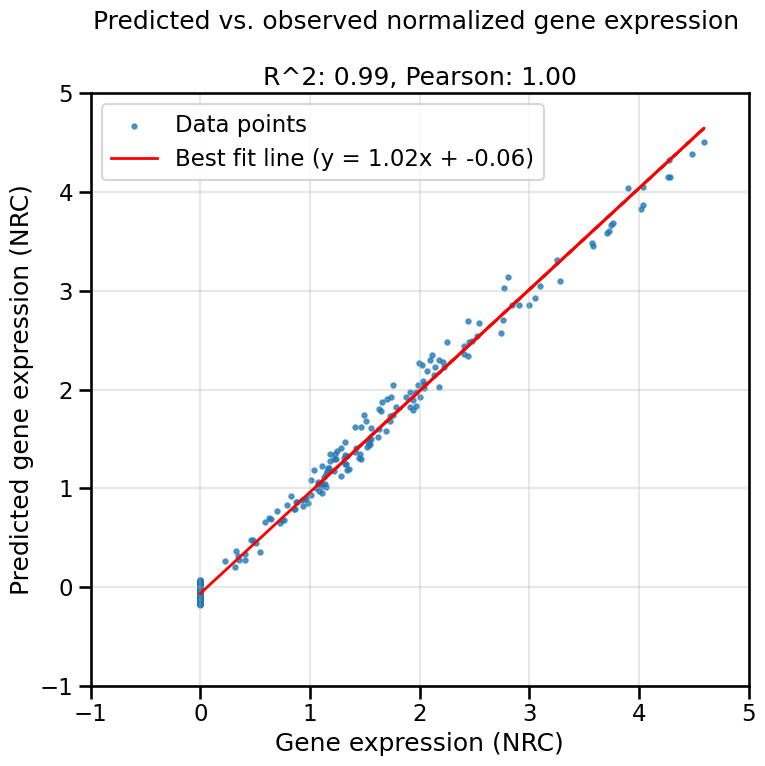

In [277]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

# Regression evaluation and analysis
def plot_and_score_r2(cell_dict):
    '''
    Plot and score R^2 and Pearson correlation coefficient.

    Args:
    - cell_dict: Dictionary containing cell-specific information.

    Returns:
    - None
    '''
    y_hat = []
    y = []

    # Extract predictions and labels
    for idx in cell_dict.keys():
        for key in cell_dict[idx].keys():
            if key in selected_gene_names:
                y_hat.append(cell_dict[idx][key]['pred'])
                y.append(cell_dict[idx][key]['label'])

    # Compute R^2 score
    r2 = r2_score(y, y_hat)

    # Compute Pearson correlation coefficient
    pearson_corr, _ = pearsonr(y, y_hat)

    # Print metrics
    print(f"R^2 Score: {r2}")
    print(f"Pearson Correlation Coefficient: {pearson_corr}")

    # Scatter plot of predictions and observations
    plt.figure(figsize=(8, 8))  # Make the plot larger for clarity
    plt.scatter(y, y_hat, s=10, alpha=0.7, label="Data points")  # Smaller dots with some transparency

    # Compute line of best fit
    coefficients = np.polyfit(y, y_hat, 1)  # Fit a line (degree 1 polynomial)
    best_fit_line = np.poly1d(coefficients)
    y_fit = best_fit_line(y)

    # Plot the line of best fit
    plt.plot(y, y_fit, color="red", linewidth=2, label=f"Best fit line (y = {coefficients[0]:.2f}x + {coefficients[1]:.2f})")

    # Adjust axes limits and set integer increments
    min_val = int(min(min(y), min(y_hat)))
    max_val = int(max(max(y), max(y_hat)))
    buffer = 1  # Add a buffer of 1 for spacing

    plt.xlim(min_val - buffer, max_val + buffer)
    plt.ylim(min_val - buffer, max_val + buffer)
    plt.xticks(range(min_val - buffer, max_val + buffer + 1, 1))  # Integer ticks
    plt.yticks(range(min_val - buffer, max_val + buffer + 1, 1))  # Integer ticks

    # Add labels, legend, and title
    plt.xlabel('Gene expression (NRC)')
    plt.ylabel('Predicted gene expression (NRC)')
    plt.title(f'Predicted vs. observed normalized gene expression \n\nR^2: {r2:.2f}, Pearson: {pearson_corr:.2f}')
    plt.legend()
    plt.grid(alpha=0.3)  # Add a light grid for better readability
    plt.tight_layout()  # Ensure proper spacing in the plot
    plt.show()

# Call the function
plot_and_score_r2(cell_dict)


R^2 Score: -2.276406537177611
Pearson Correlation Coefficient: -0.1340653250764205


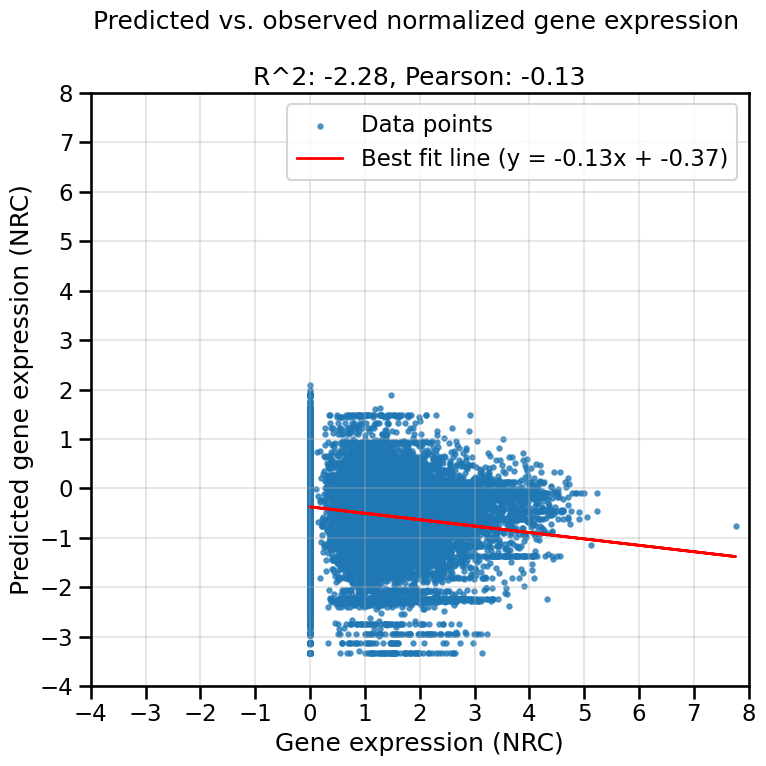

In [ ]:
plot_and_score_r2(cell_dict) # this is scGPT baseline

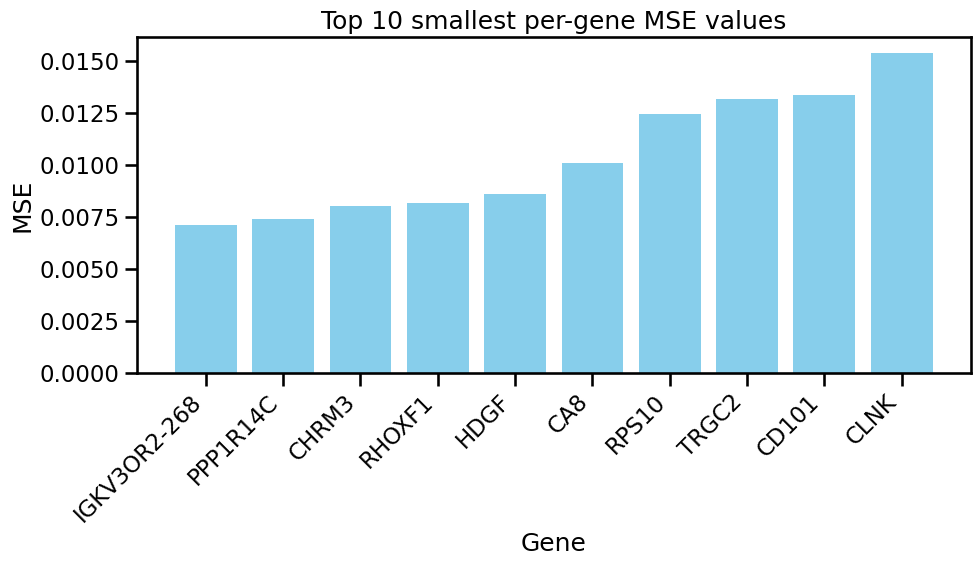

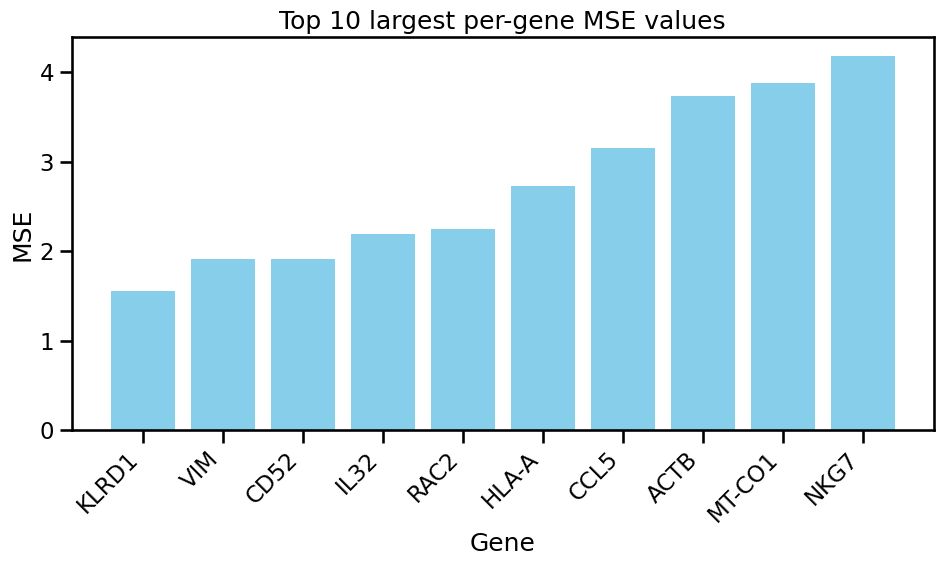

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

def plot_extreme_values(data_dict, k, mode):
    for key in data_dict:
      data_dict[key] = np.mean(data_dict[key])
    """
    Plots a bar graph of the k highest and k smallest values in the dictionary.

    Parameters:
        data_dict (dict): Dictionary with keys as labels and values as numerical data.
        k (int): Number of highest and smallest values to display.
    """
    # Sort the dictionary by values
    sorted_items = sorted(data_dict.items(), key=lambda x: x[1])

    # Extract k smallest and k largest
    smallest_k = sorted_items[:k]
    largest_k = sorted_items[-k:]

    # Combine for plotting
    if(mode == 'smallest'):
      extreme_values = smallest_k
    elif(mode == 'largest'):
      extreme_values = largest_k
    else:
      raise Exception("Invalid mode")

    # Unpack labels and values
    labels, values = zip(*extreme_values)

    # Create bar plot
    x_pos = np.arange(len(labels))
    plt.figure(figsize=(10, 6))
    plt.bar(x_pos, values, color="skyblue")
    plt.xticks(x_pos, labels, rotation=45, ha="right")
    plt.title(f"Top {k} {mode} per-gene MSE values")
    plt.xlabel("Gene")
    plt.ylabel("MSE")
    plt.tight_layout()
    plt.show()

plot_extreme_values(gene_dict, 10, 'smallest')
plot_extreme_values(gene_dict, 10, 'largest')

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


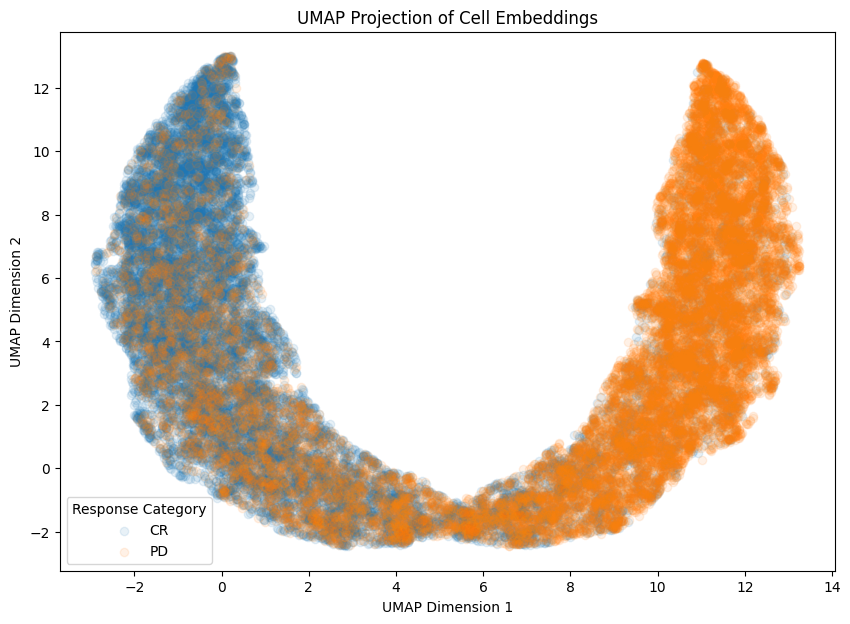

In [ ]:
# plot umap of cell embeddings
import umap
import matplotlib.pyplot as plt

plot_umap_embeddings(cell_dict)

In [ ]:
# save cell_dict pkl file
import pickle
with open('/content/drive/MyDrive/cell_dict_12.16.2024.v01.pkl', 'wb') as f:
    pickle.dump(cell_dict, f)

In [ ]:
import pickle
cell_dict = pickle.load(open('/content/drive/MyDrive/cell_dict_12.10.2024.v04.pkl', 'rb'))
# gene_dict = pickle.load(open('/content/drive/MyDrive/gene_dict_12.10.2024.v01.pkl', 'rb'))

In [ ]:
import numpy as np

def remove_outliers_iqr(data):
    import numpy as np

    # Convert to numpy array for easier calculations
    data = np.array(data)

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Determine outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    return [x for x in data if lower_bound <= x <= upper_bound]

averages = []
for gene in gene_dict.keys():
  avg = np.mean(gene_dict[gene])
  averages.append(avg)

# remove outliers
averages = averages #remove_outliers_iqr(averages)
print(f"Average MSE loss after removing outliers: {np.mean(averages)}")

Average MSE loss after removing outliers: 0.21599804098998127


In [ ]:
print(fae)

(85409, 961, 4)


In [ ]:
# save model
torch.save(model.state_dict(), '/content/drive/MyDrive/car_tce_12.16.2024.pth')
print(model)

DynamicGAT(
  (embedding): ShallowGeneEmbedding(
    (embedding): Linear(in_features=4, out_features=512, bias=False)
  )
  (decoupled_embedding): ShallowAttentionEmbedding(
    (embedding): Embedding(961, 512)
  )
  (layers): ModuleList(
    (0-3): 4 x DynamicGATLayer(512, 512)
  )
  (layer_norms_val): ModuleList(
    (0-3): 4 x LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (layer_norms_att): ModuleList(
    (0-3): 4 x LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (skip_connections): ModuleList(
    (0-3): 4 x Sequential(
      (0): Linear(in_features=512, out_features=512, bias=False)
      (1): LeakyReLU(negative_slope=0.2)
    )
  )
  (dropouts): ModuleList(
    (0-3): 4 x Dropout(p=0.1, inplace=False)
  )
  (regressor): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=256, out_features=1, bias=True)
  )
  (classifier): Seque

In [ ]:
num_genes = 211
n_features = 4
embedding_dim = 512
hidden_dim = 1024
output_dim = 512
num_layers = 4
num_sparse_connections = min(512, num_genes)
heads = 4
att_threshold = 1/(num_genes**2)
n_classes = 2
model = DynamicGAT(num_genes=num_genes, in_channels=n_features, embedding_dim = embedding_dim, hidden_channels=hidden_dim, out_channels=output_dim, num_layers=num_layers, n_classes=n_classes, threshold=att_threshold, heads=heads, num_sparse_connections=num_sparse_connections).to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/car_tce_12.3.2024.pth'))

In [ ]:
fae_expression_only = fae[:,:,0].reshape(fae.shape[0], -1)
print(fae_expression_only.shape)
responses_fae_only = np.array(responses_fae)
print(responses_fae_only.shape)

(85409, 211)
(85409,)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Define the MLP Classifier
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

        # initialize
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

def train_mlp_classifier(features, responses, epochs=20, hidden_size=128, learning_rate=0.001, test_ratio=0.1):
    # One-hot encode responses
    encoder = OneHotEncoder()
    responses_encoded = encoder.fit_transform(responses.reshape(-1, 1))
    num_classes = responses_encoded.shape[1]
    print(responses_encoded.shape)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, responses_encoded, test_size=test_ratio, shuffle=True)

    # Convert data to PyTorch tensors
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    if hasattr(y_train, "toarray"):
        y_train = y_train.toarray()
    y_train = torch.tensor(y_train, dtype=torch.float32)
    if hasattr(y_test, "toarray"):
        y_test = y_test.toarray()
    y_test = torch.tensor(y_test, dtype=torch.float32)

    # create dataloader
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Initialize model, loss function, and optimizer
    input_size = X_train.shape[1]
    model = MLPClassifier(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-2)

    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        for inputs, labels in tqdm(train_loader):
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          optimizer.zero_grad()

        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        y_pred = torch.argmax(outputs, dim=1)

    # Convert predictions to numpy arrays
    y_pred = y_pred.numpy()
    y_test = torch.argmax(y_test, dim=1).numpy()

    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\nAccuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(report)

# sample n rows
n = 60000
indices = np.random.choice(fae_expression_only.shape[0], size=n, replace=False)
print(indices)
fae_expression_only_sampled = fae_expression_only[indices]
responses_fae_only_sampled = responses_fae_only[indices]
train_mlp_classifier(fae_expression_only_sampled, responses_fae_only_sampled, 1, hidden_size=512, test_ratio=0.5)


[26427 72971 36469 ...  9047 36727 30237]
(60000, 2)


100%|██████████| 938/938 [00:01<00:00, 515.26it/s]



Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77     11600
           1       0.84      0.91      0.87     18400

    accuracy                           0.84     30000
   macro avg       0.83      0.82      0.82     30000
weighted avg       0.84      0.84      0.83     30000



In [ ]:
# compile embeds and responses from cell_dict into fae_expression and responses like structure
cell_embeds = []
cell_responses = []
for cell in cell_dict.values():
  cell_embeds.append(cell['embed'])
  cell_responses.append(cell['response'])

cell_embeds = np.array(cell_embeds).reshape(len(cell_embeds), -1)
cell_responses = np.array(['CR' if response == 0 else 'PD' for response in cell_responses])

print(cell_embeds.shape)
print(cell_responses.shape)

(38379, 512)
(38379,)


In [ ]:
# finetuning embeddings
train_mlp_classifier(cell_embeds, cell_responses, 1, hidden_size=512, test_ratio=0.2)

(38379, 2)


100%|██████████| 960/960 [00:03<00:00, 319.80it/s]



Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      3319
           1       0.84      0.81      0.82      4357

    accuracy                           0.80      7676
   macro avg       0.80      0.80      0.80      7676
weighted avg       0.80      0.80      0.80      7676

